In [1]:
import gc
import math
import os
import pathlib
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
def detect_failure(df):
    failures = df.index[(df.time_to_failure.shift(1) > df.time_to_failure) & (df.time_to_failure.shift(-1) > df.time_to_failure)].tolist()
    return failures

In [4]:
earthquake_margin_indexes =[
    5656573,
    50085877,
    104677355,
    138772452,
    187641819,
    218652629,
    245829584,
    307838916,
    338276286,
    375377847,
    419368879,
    461811622,
    495800224,
    528777114,
    585568143,
    621985672
]

In [5]:
earthquake_1_data_len = earthquake_margin_indexes[1] - earthquake_margin_indexes[0]

In [6]:
#pd.read_csv?

train_df = pd.read_csv(
    '../input/train/train.csv',
    #nrows=100000000,
    #names=['acoustic_data', 'time_to_failure'],
    dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32},
    #skiprows=earthquake_margin_indexes[0],
    #nrows=earthquake_1_data_len
)

In [7]:
for_investigation_df = pd.read_csv(
    '../input/train/train.csv',
    #nrows=100000000,
    names=['acoustic_data', 'time_to_failure'],
    dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32},
    skiprows=earthquake_margin_indexes[0],
    nrows=earthquake_1_data_len
)

In [8]:
#earthquake_margin_indexes = detect_failure(train_df)

In [9]:
#print(earthquake_margin_indexes)

In [10]:
#train_df.info()

In [11]:
#for_investigation_df = train_df.iloc[earthquake_margin_indexes[0]:earthquake_margin_indexes[1], :]

In [12]:
#earthquake_1_data_len = for_investigation_df.shape[0]

In [13]:
for_investigation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44429304 entries, 0 to 44429303
Data columns (total 2 columns):
acoustic_data      float32
time_to_failure    float32
dtypes: float32(2)
memory usage: 339.0 MB


In [14]:
for_investigation_df.head()

,acoustic_data,time_to_failure
0,5.0,0.000795
1,4.0,0.000795
2,4.0,11.540800
3,5.0,11.540800
4,6.0,11.540800


In [15]:
acoustic_data_chunks = for_investigation_df['acoustic_data'].values[::20]
time_to_failure_chunks = for_investigation_df['time_to_failure'].values[::20]

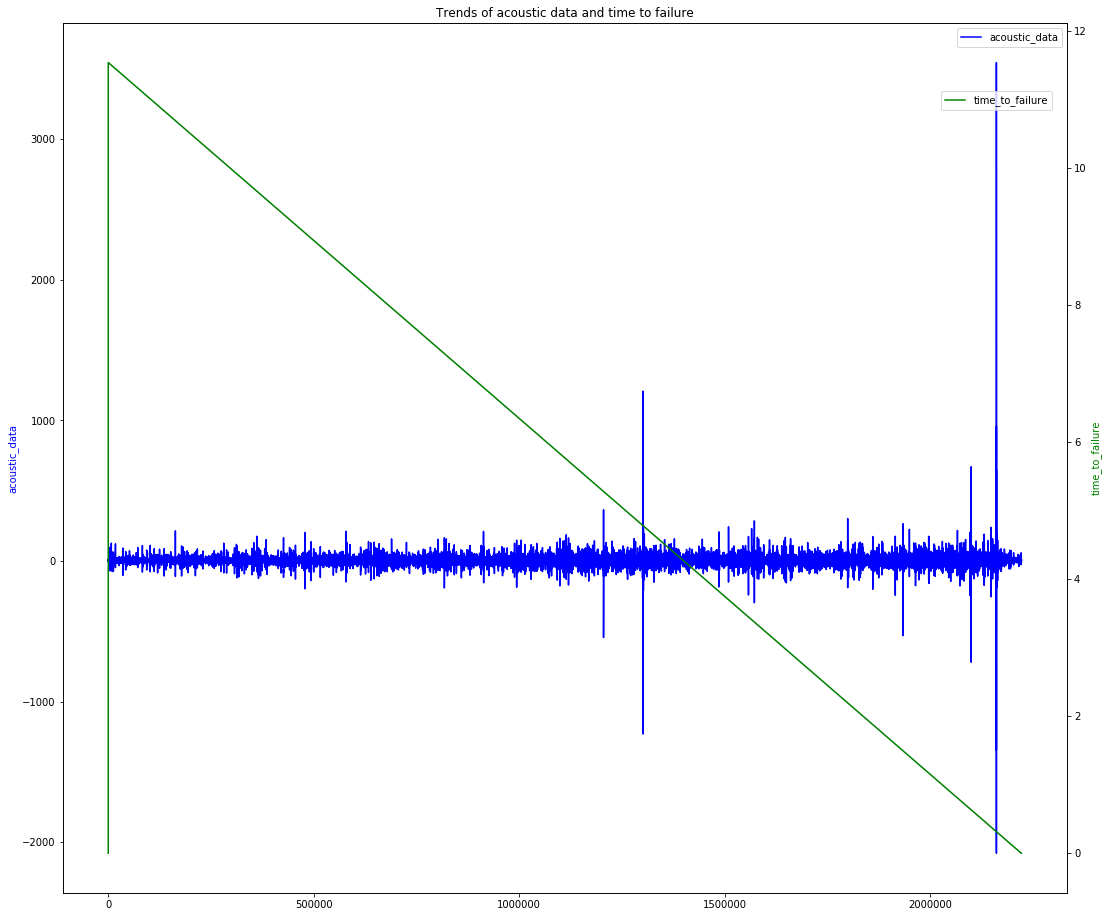

In [16]:
fig1, ax1 = plt.subplots(figsize=(18, 16))
plt.title("Trends of acoustic data and time to failure")
plt.plot(acoustic_data_chunks, color='b')
ax1.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
ax2 = ax1.twinx()
plt.plot(time_to_failure_chunks, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

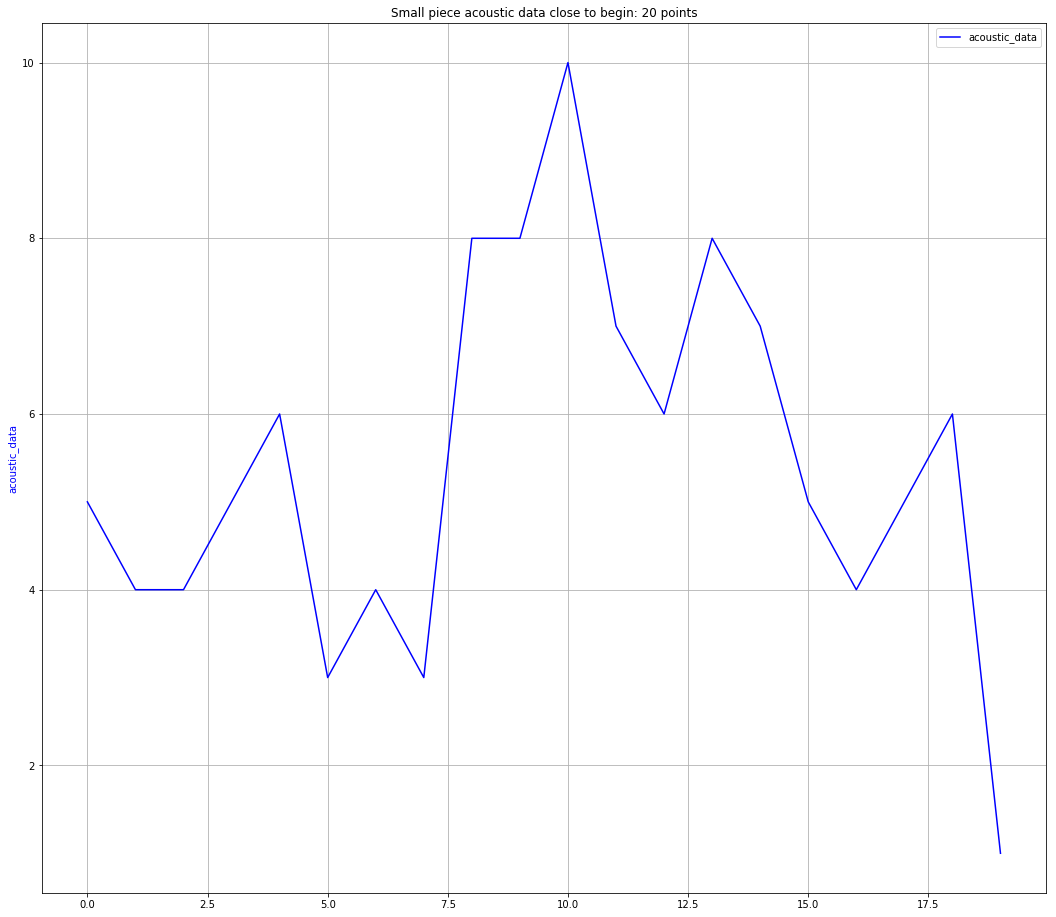

In [17]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin: 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[0:20], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

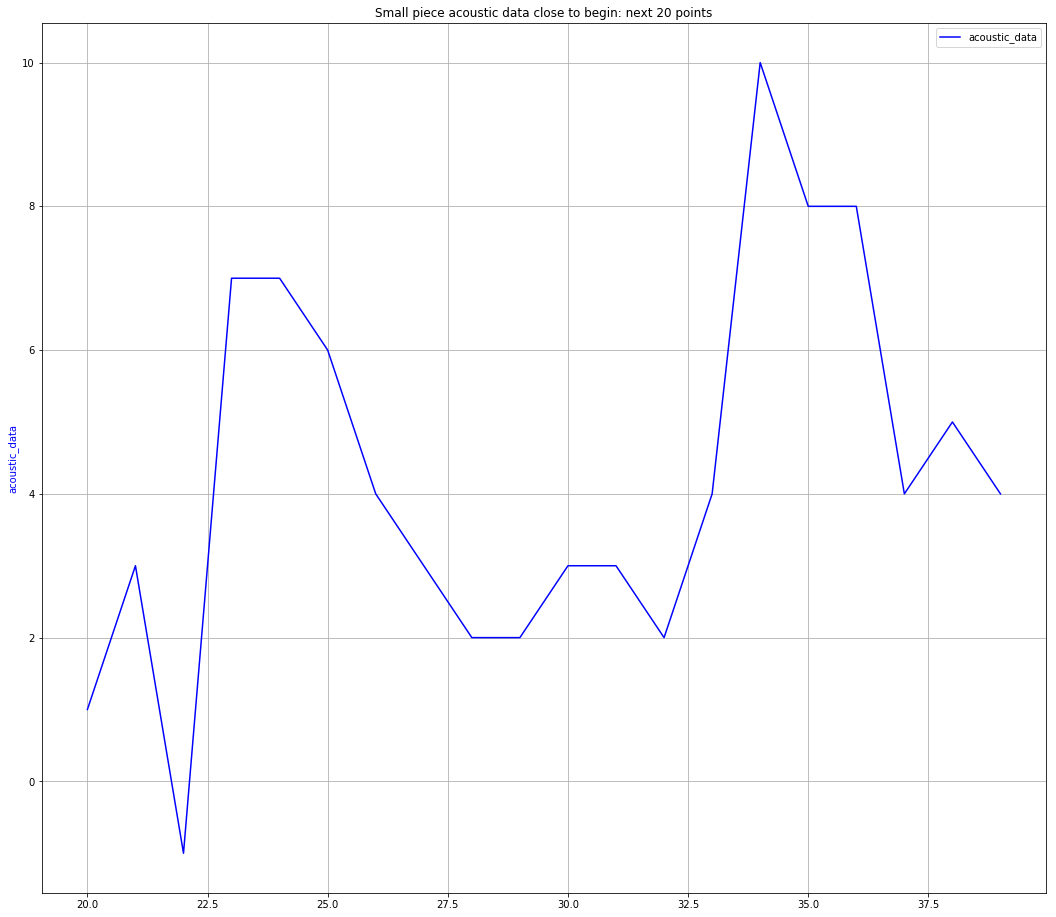

In [18]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin: next 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[20:40], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

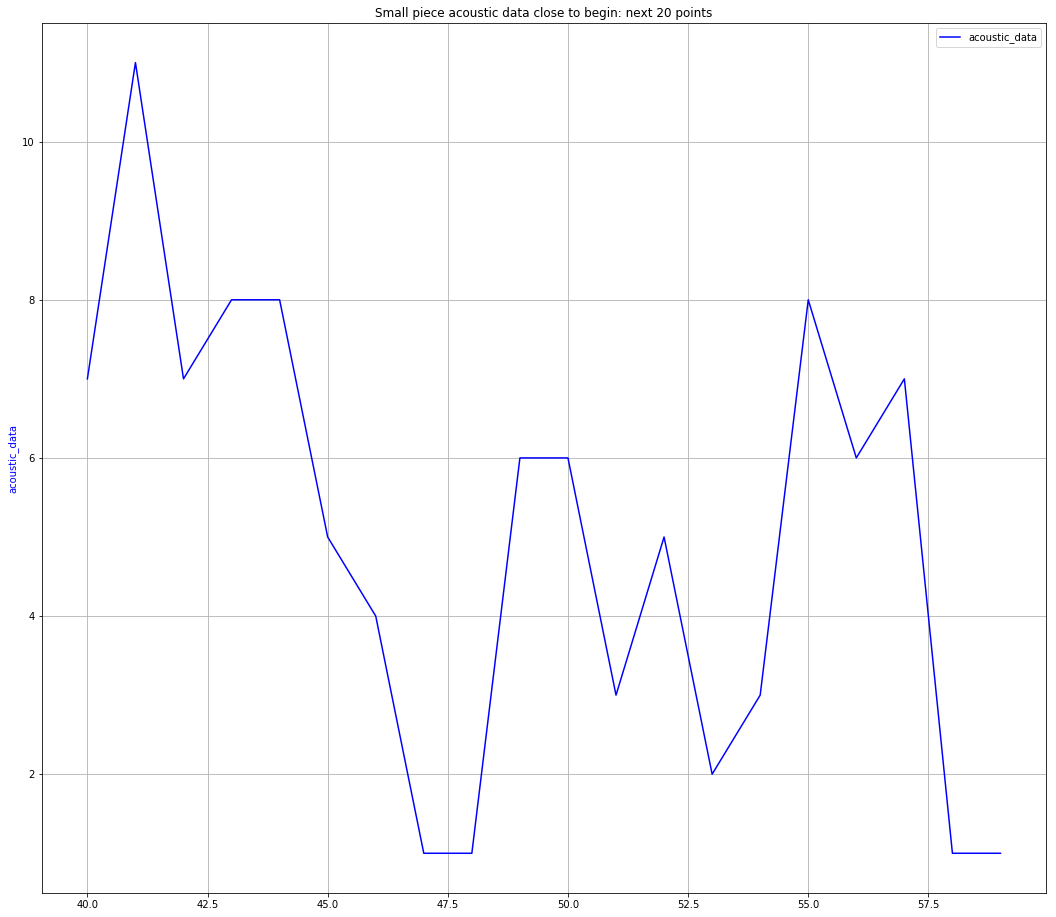

In [19]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin: next 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[40:60], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

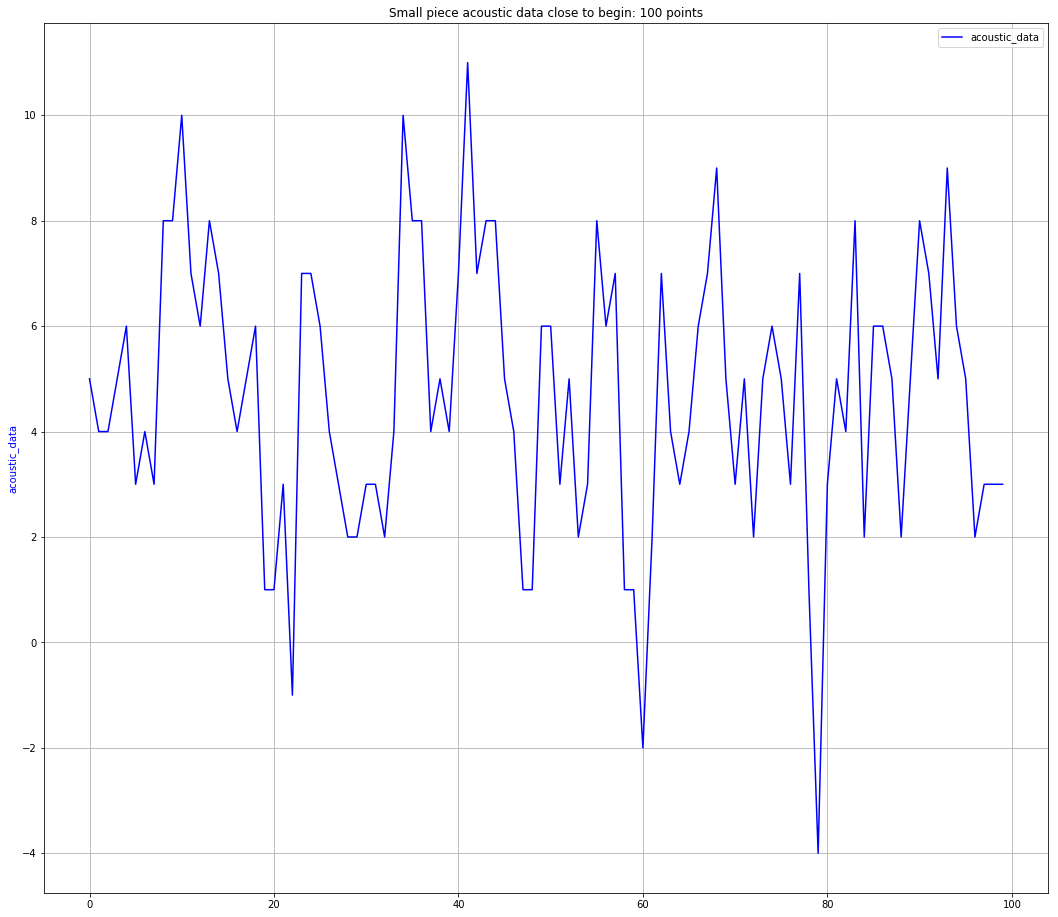

In [20]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin: 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[0:100], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

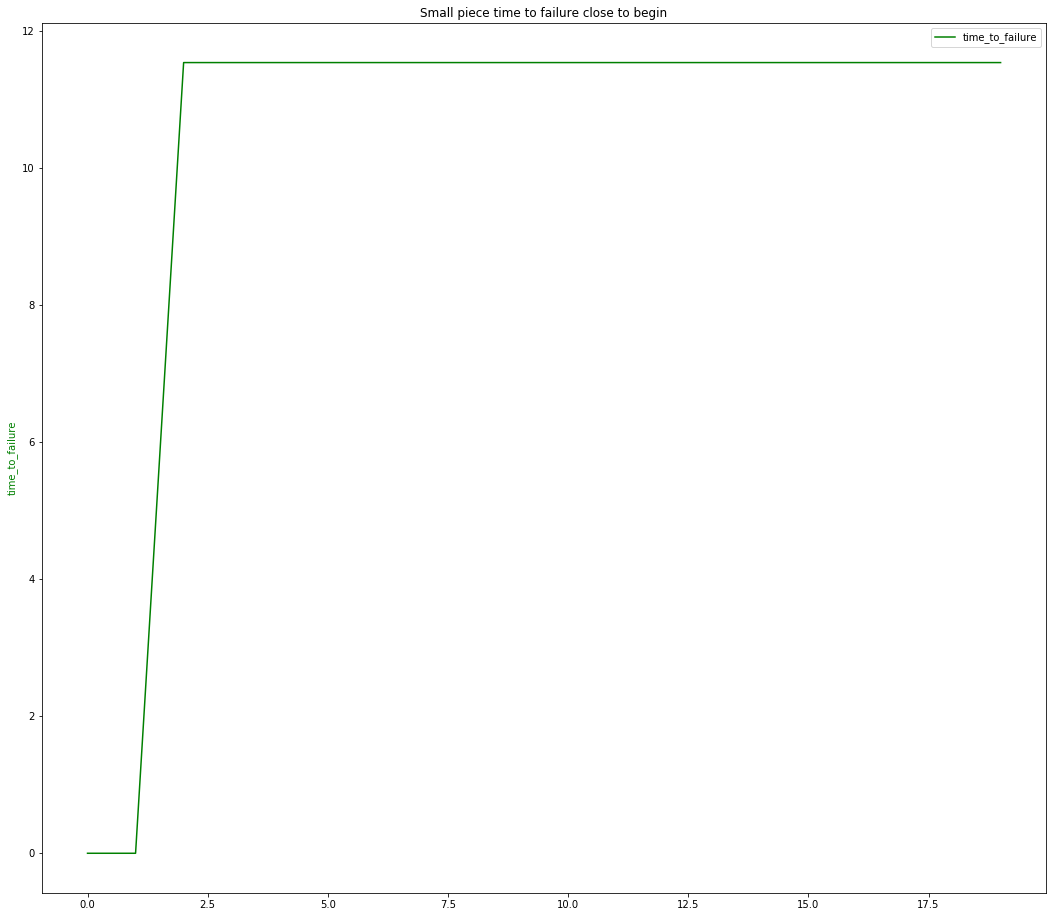

In [21]:
fig3, ax3 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure close to begin")
plt.plot(for_investigation_df['time_to_failure'].iloc[0:20], color='g')
ax3.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

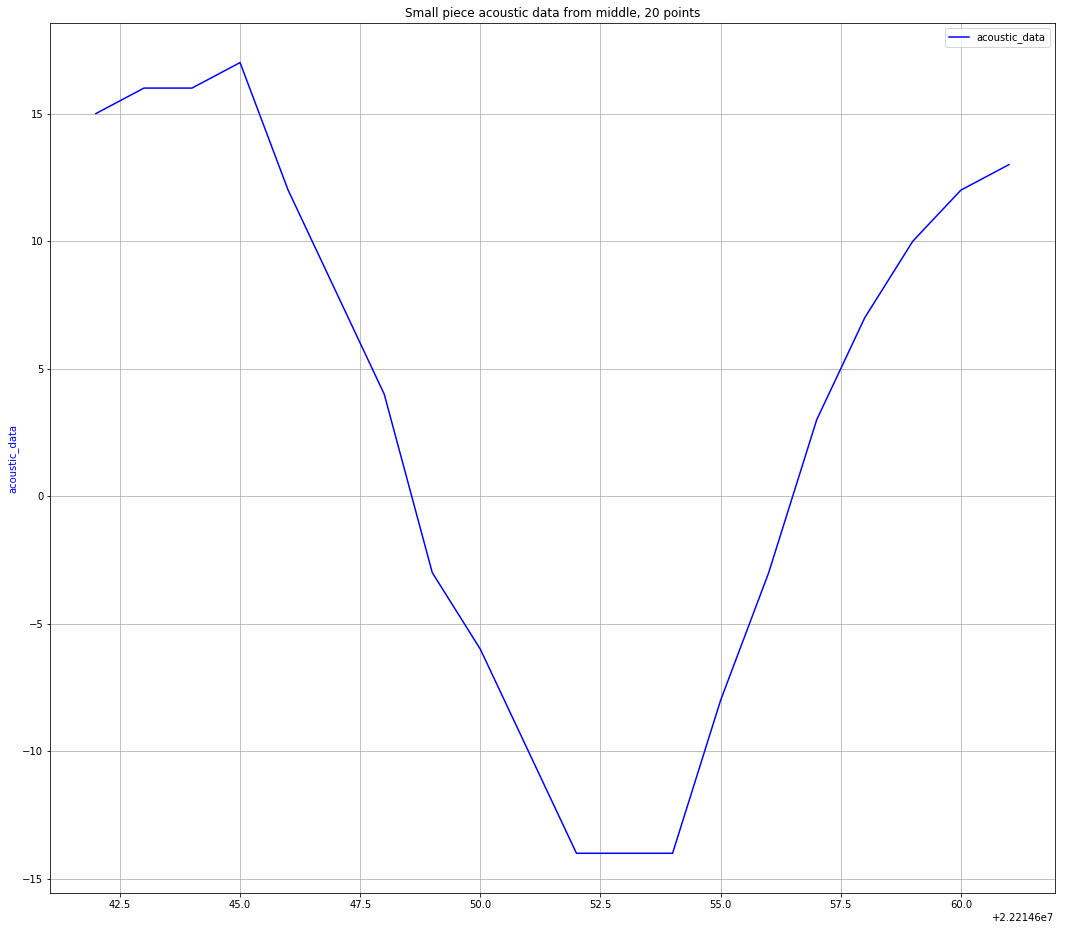

In [22]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle, 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 - 10:earthquake_1_data_len // 2 + 10], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

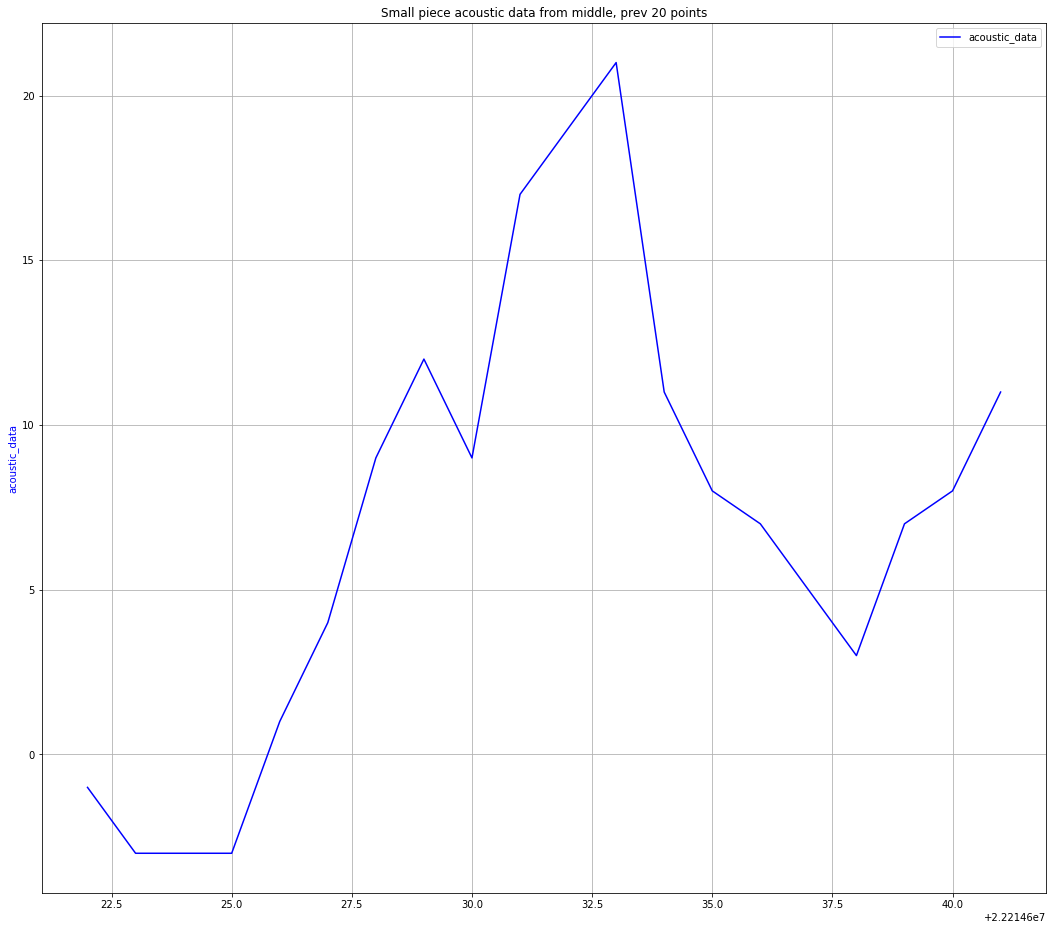

In [23]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle, prev 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 - 30:earthquake_1_data_len // 2 - 10], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

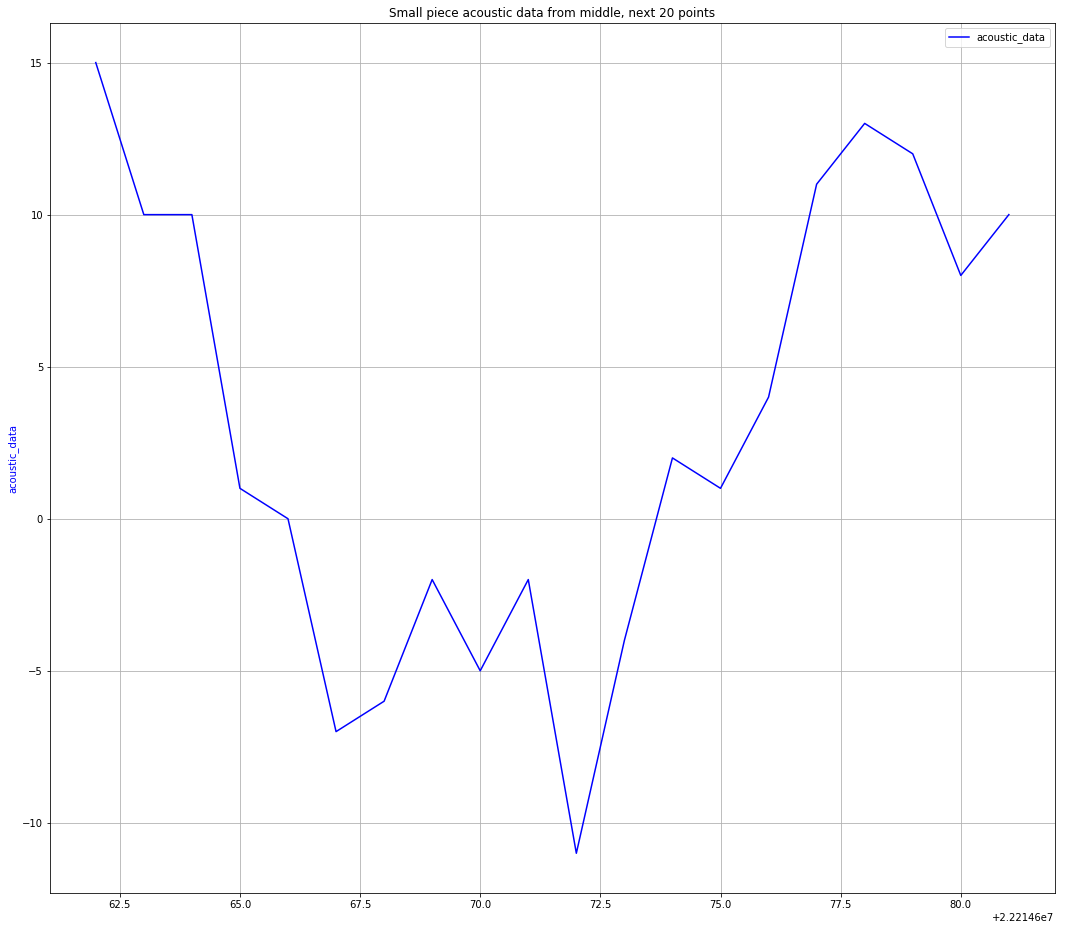

In [24]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle, next 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 + 10:earthquake_1_data_len // 2 + 30], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

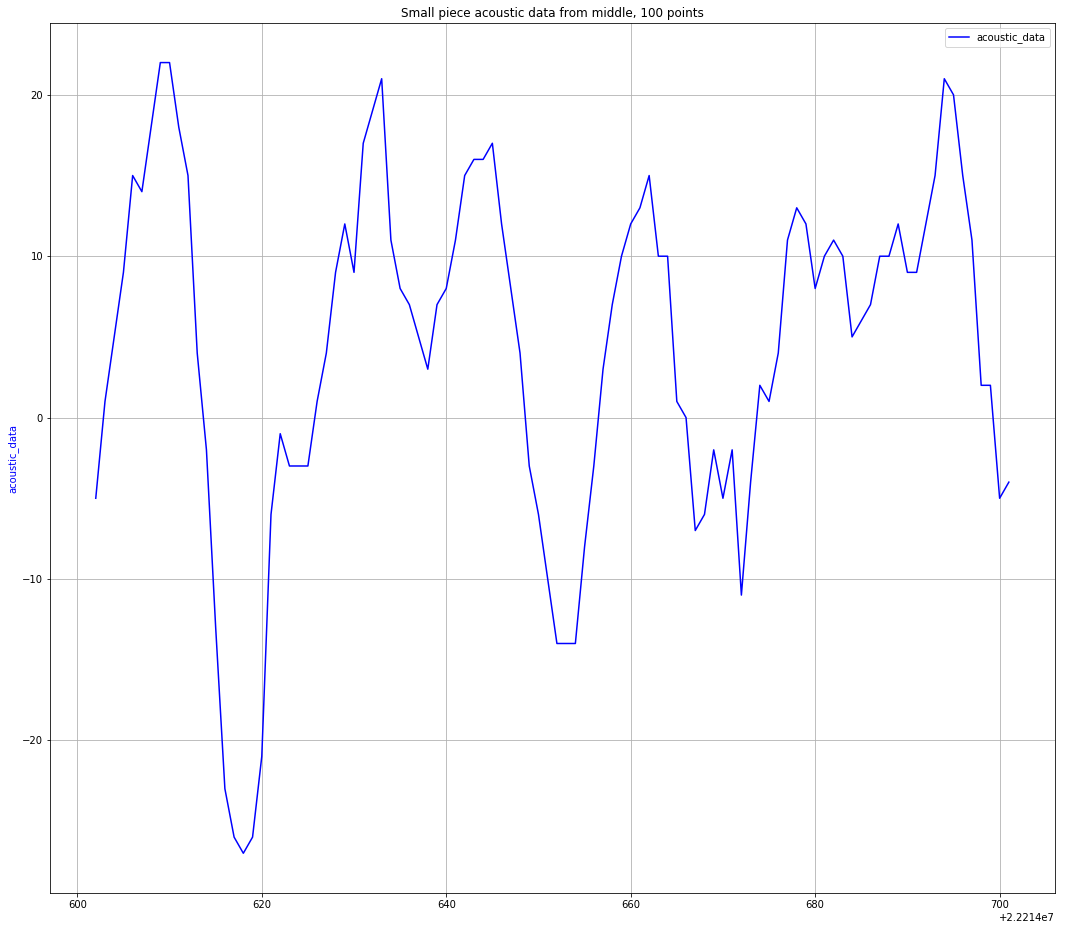

In [25]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle, 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 - 50:earthquake_1_data_len // 2 + 50], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

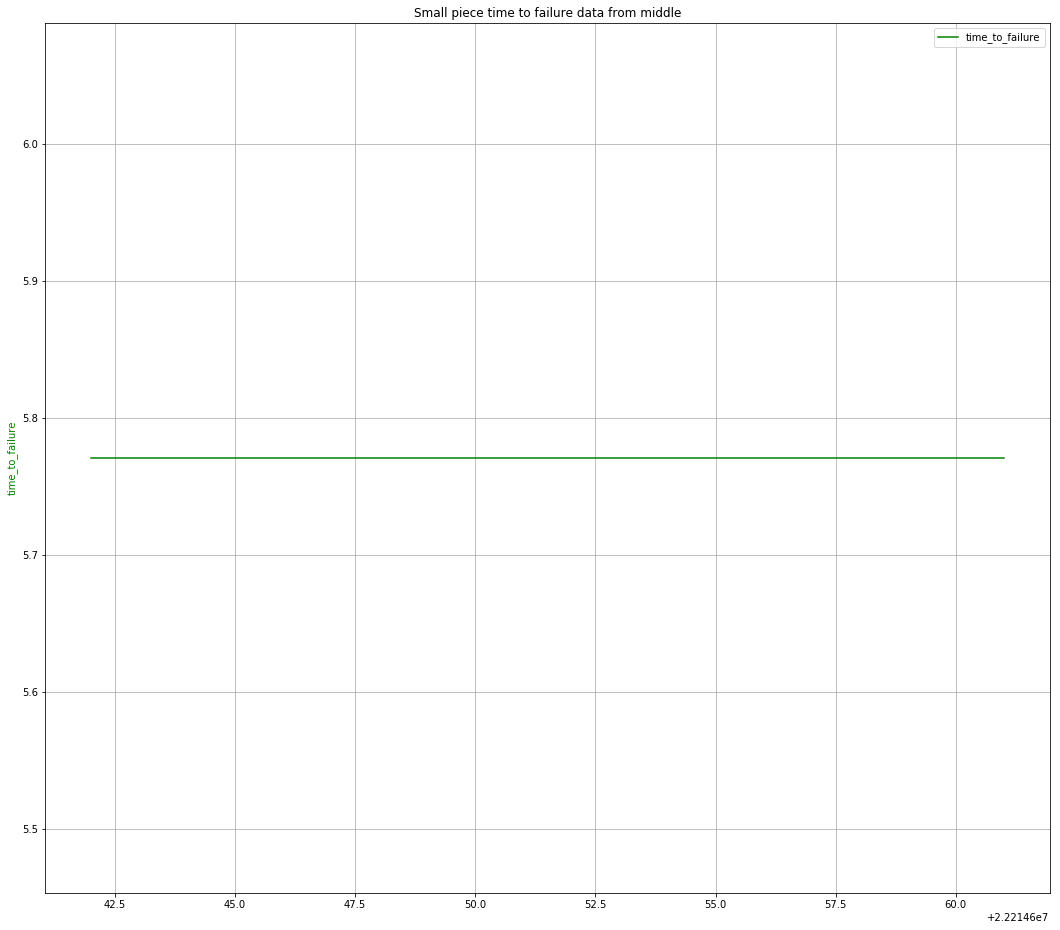

In [26]:
fig5, ax5 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure data from middle")
plt.plot(for_investigation_df['time_to_failure'].iloc[earthquake_1_data_len // 2 - 10:earthquake_1_data_len // 2 + 10], color='g')
ax5.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

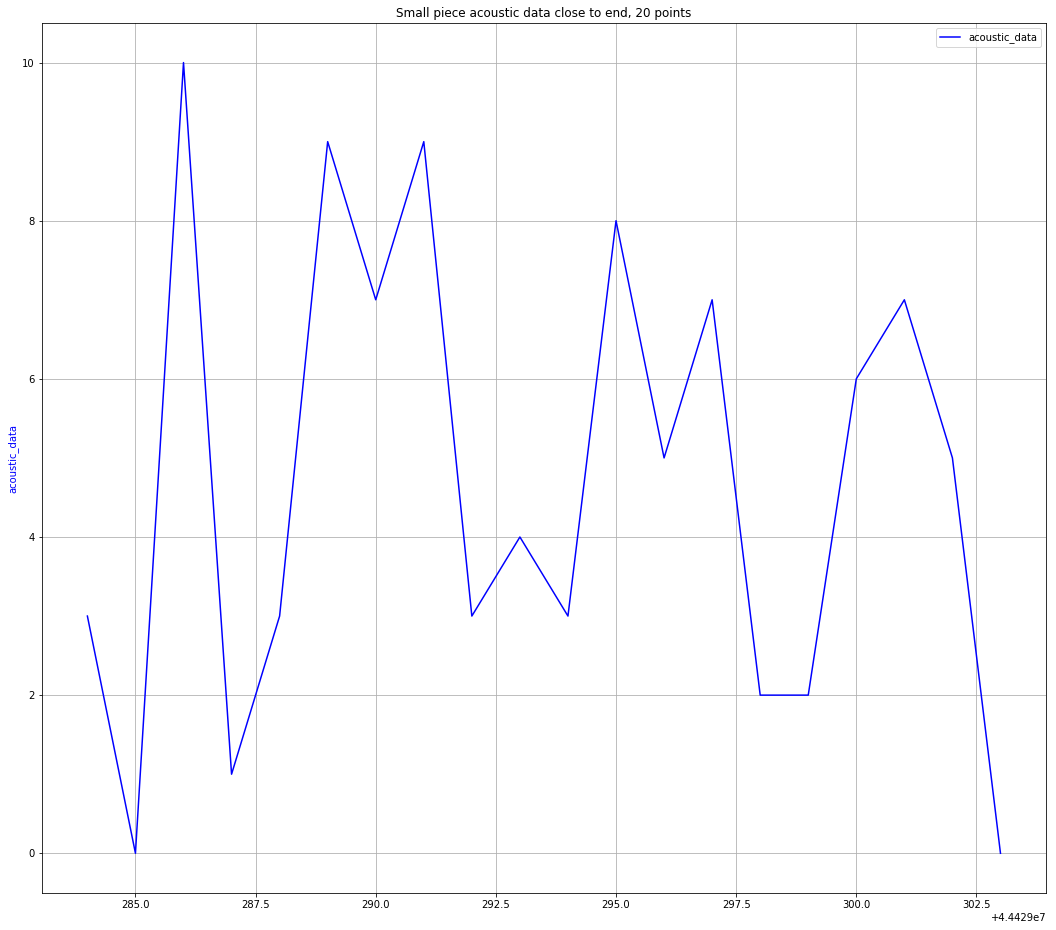

In [27]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end, 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[-20:], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

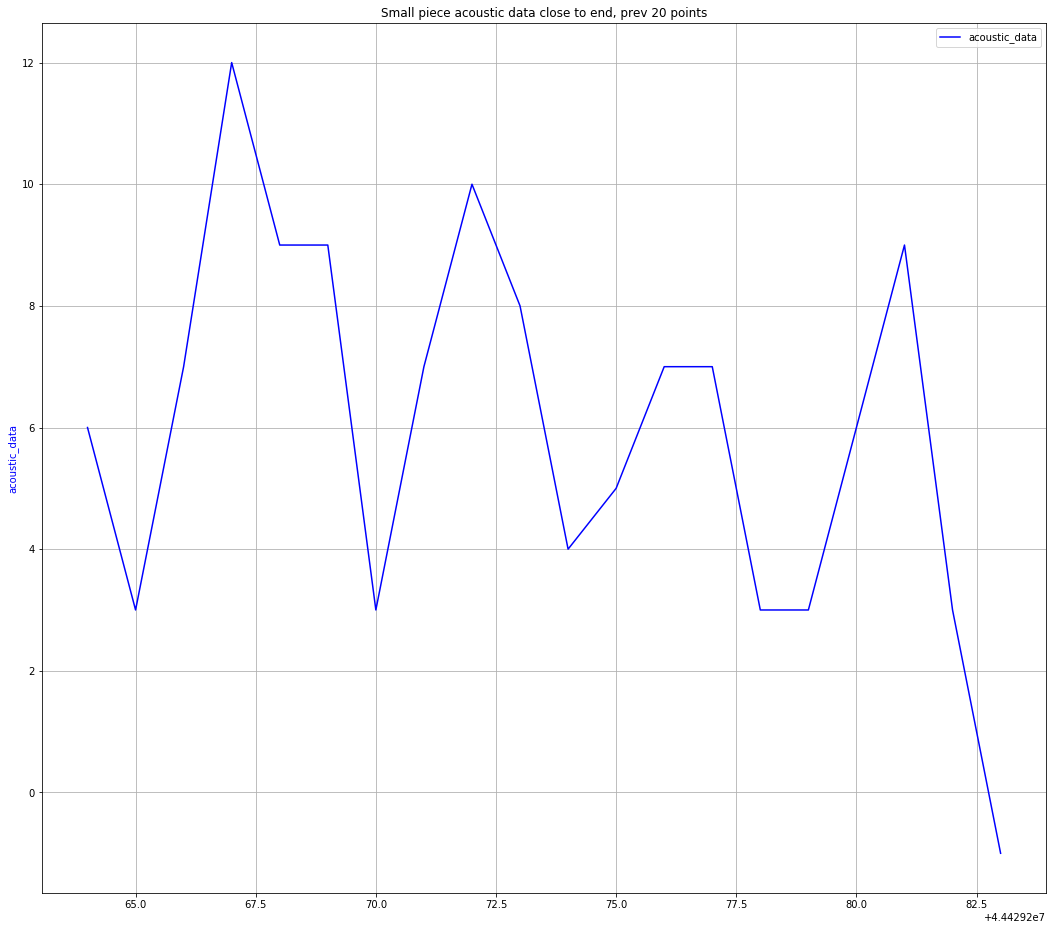

In [28]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end, prev 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[-40:-20], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

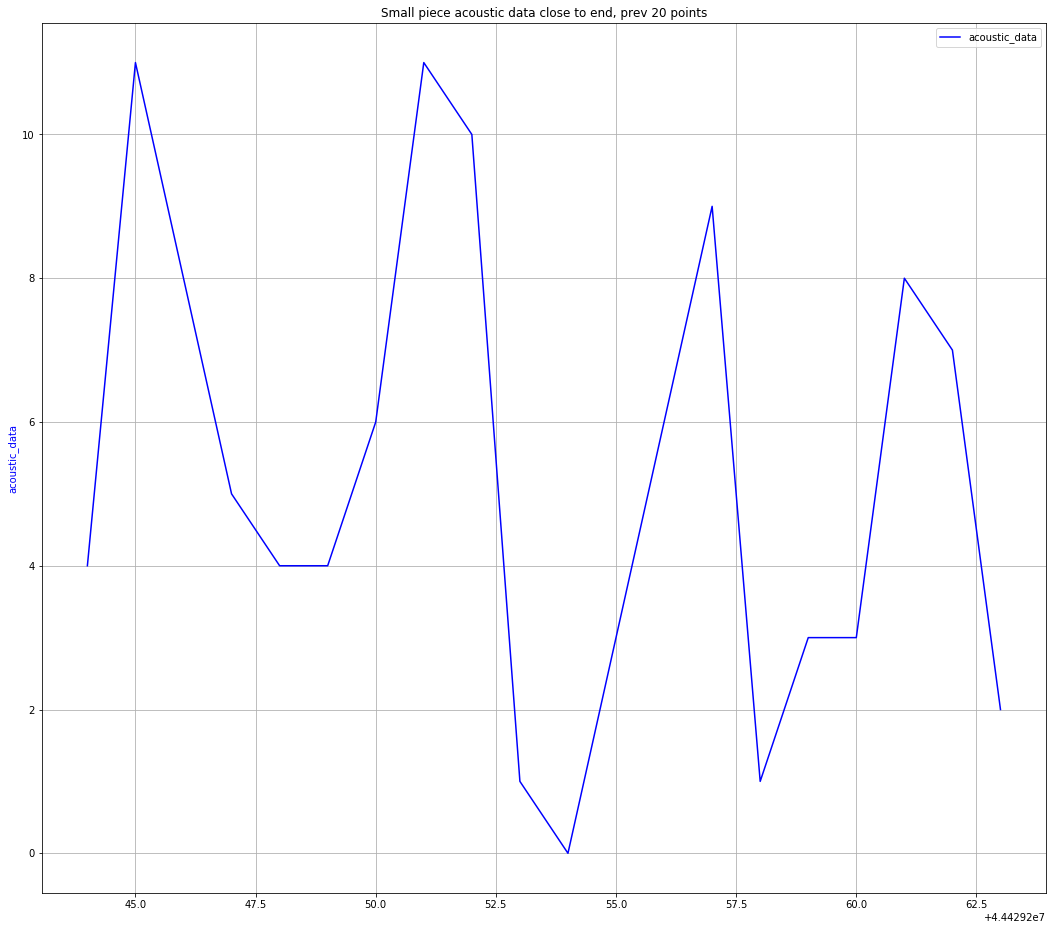

In [29]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end, prev 20 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[-60:-40], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

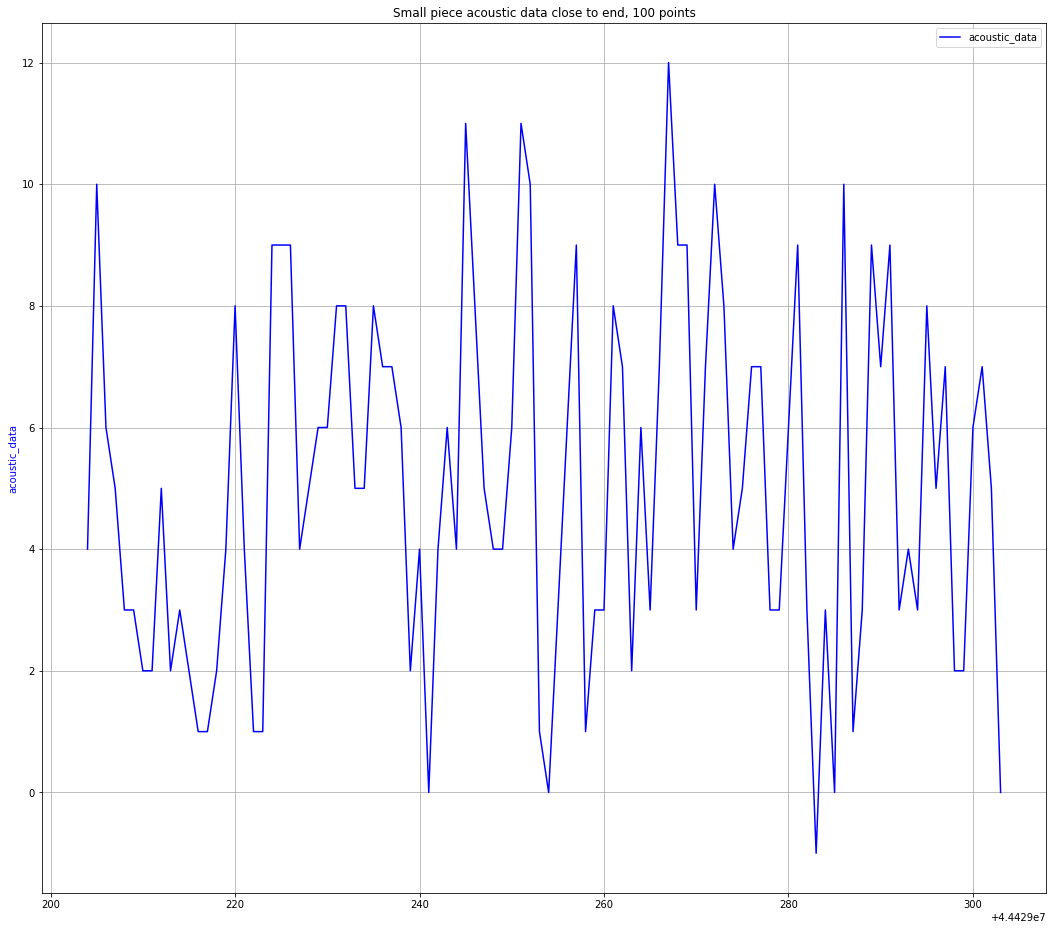

In [30]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end, 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[-100:], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

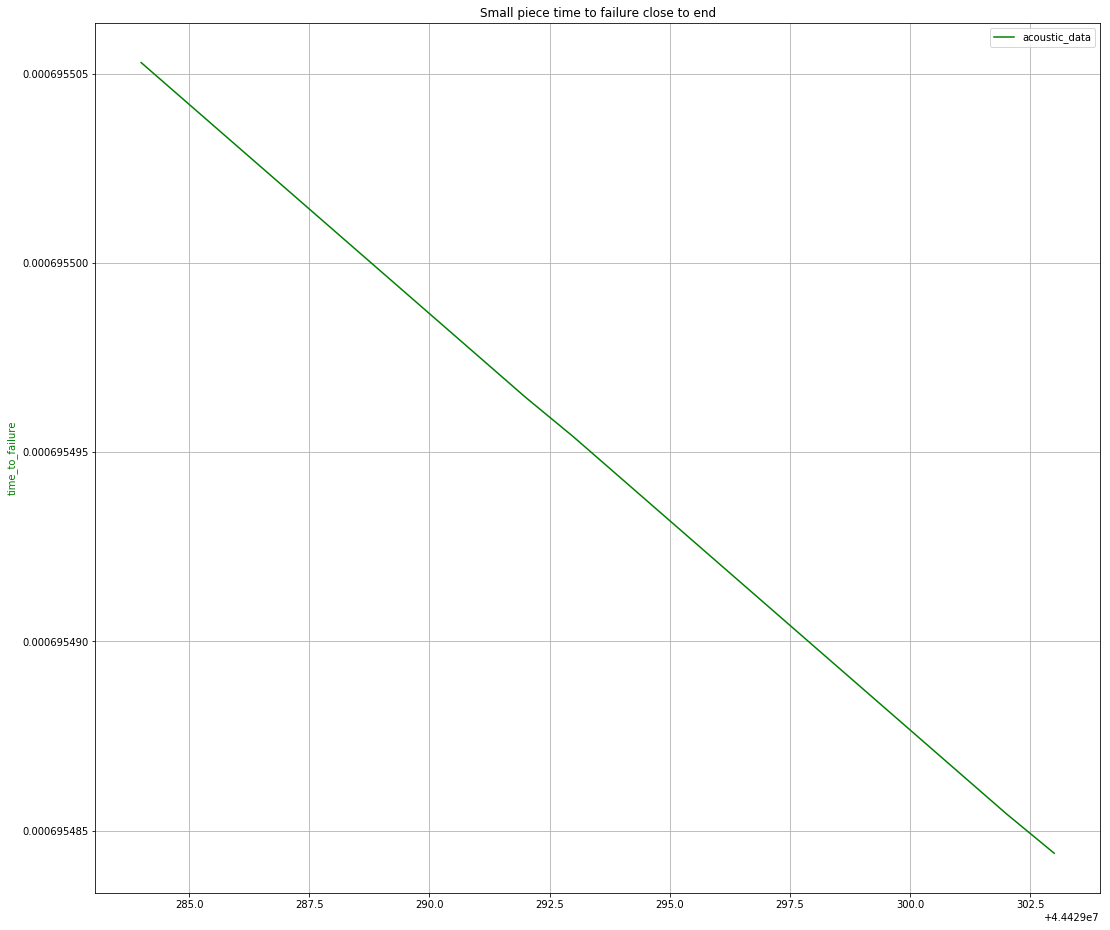

In [31]:
fig7, ax7 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure close to end")
plt.plot(for_investigation_df['time_to_failure'].iloc[-20:], color='g')
ax7.set_ylabel("time_to_failure", color='g')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

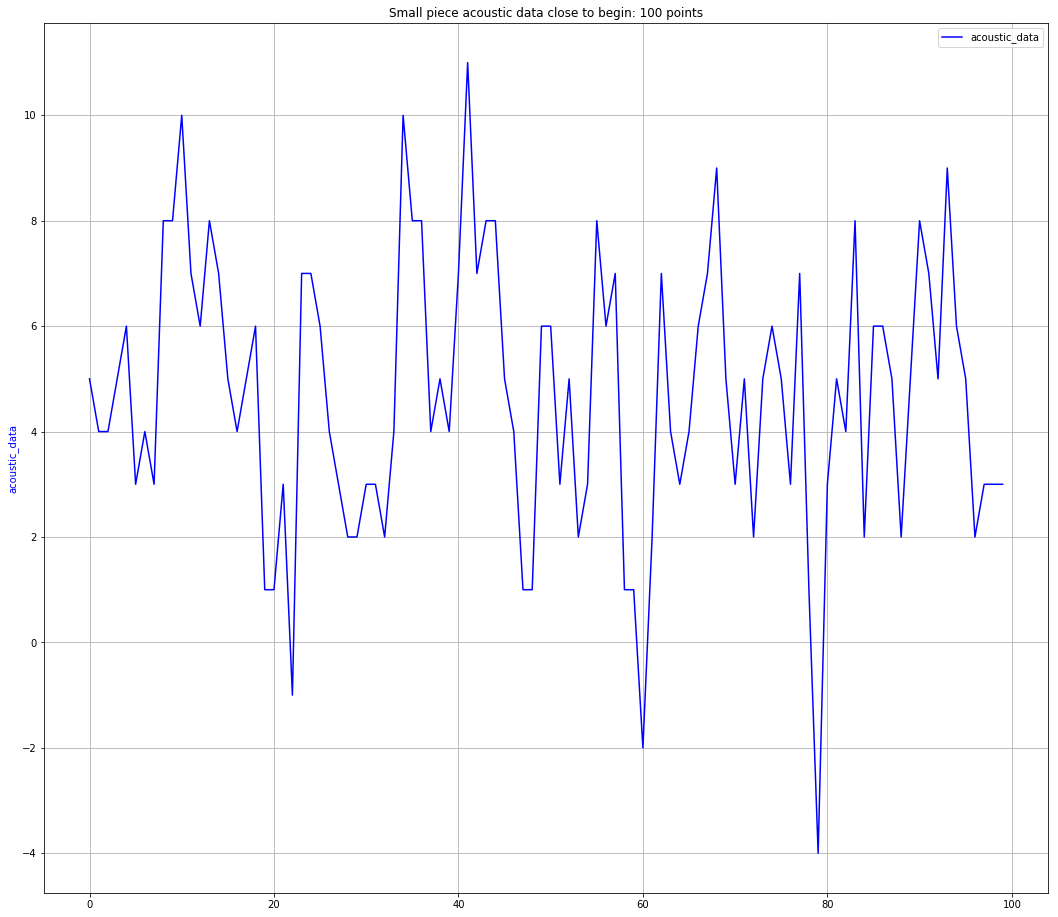

In [125]:
fig2, ax2 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to begin: 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[0:100], color='b')
ax2.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

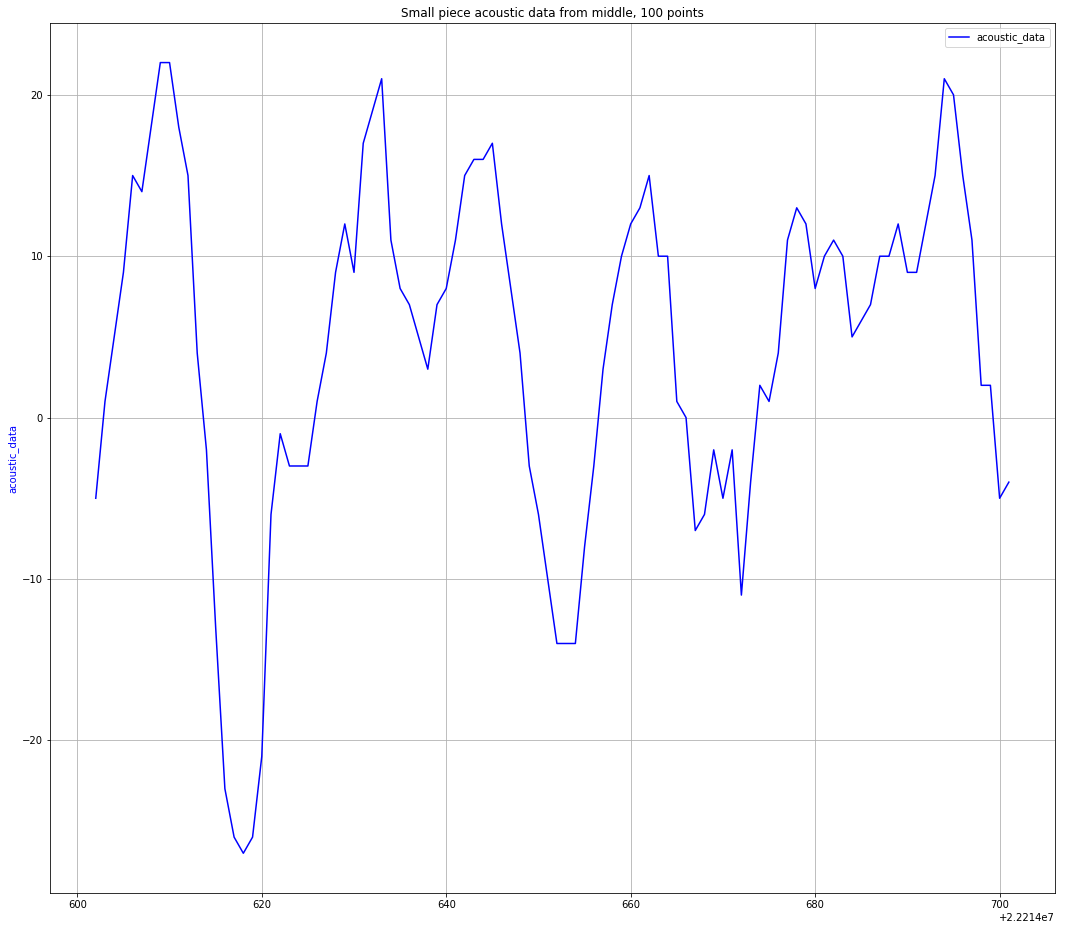

In [126]:
fig4, ax4 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data from middle, 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[earthquake_1_data_len // 2 - 50:earthquake_1_data_len // 2 + 50], color='b')
ax4.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

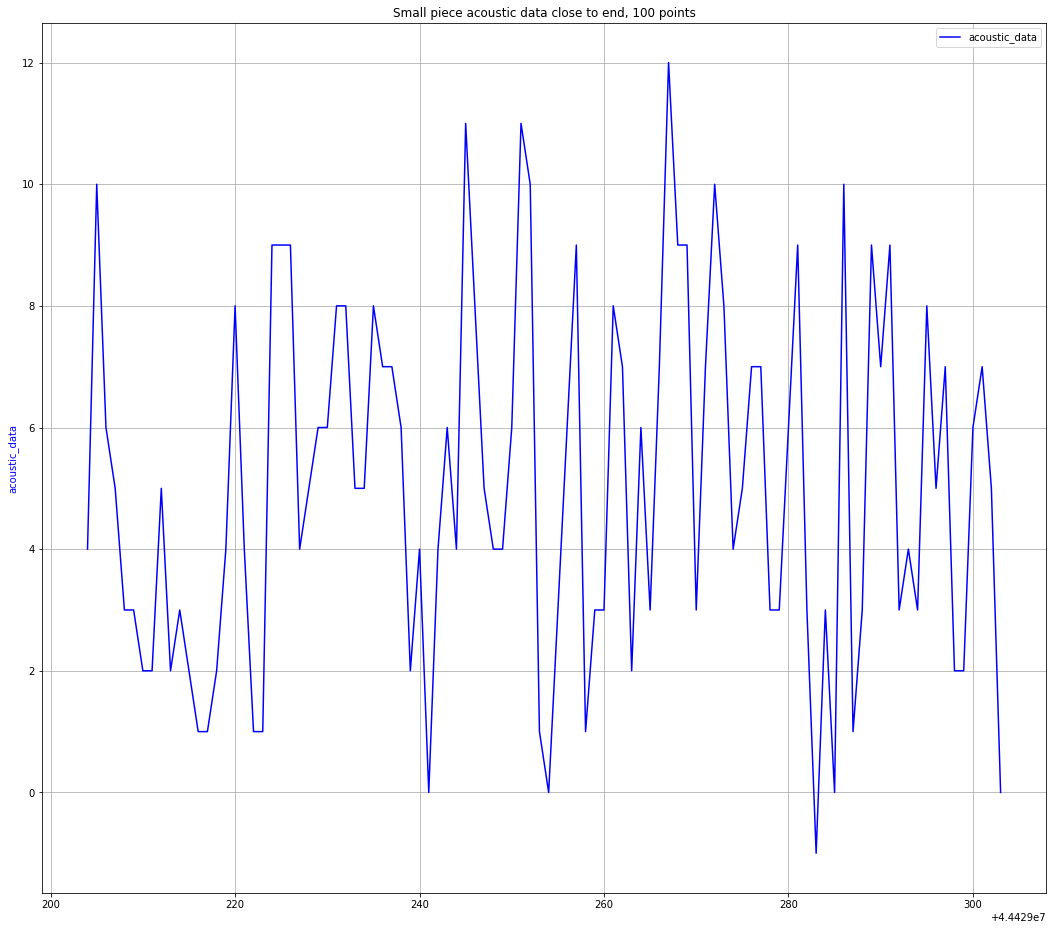

In [127]:
fig6, ax6 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data close to end, 100 points")
plt.plot(for_investigation_df['acoustic_data'].iloc[-100:], color='b')
ax6.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

In [32]:
acoustic_data_idxmin = for_investigation_df['acoustic_data'].idxmin()
acoustic_data_min = for_investigation_df['acoustic_data'].min()
acoustic_data_idxmax = for_investigation_df['acoustic_data'].idxmax()
acoustic_data_max = for_investigation_df['acoustic_data'].max()

In [33]:
print(acoustic_data_idxmax)

43215973


In [34]:
for_investigation_df.shape[0]

44429304

In [35]:
print(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmax], acoustic_data_max)

3914.0 3914.0


In [36]:
print(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmin], acoustic_data_min)

-3301.0 -3301.0


In [37]:
print(acoustic_data_idxmax, acoustic_data_idxmin)

43215973 43215454


In [38]:
print(acoustic_data_idxmax - acoustic_data_idxmin)

519


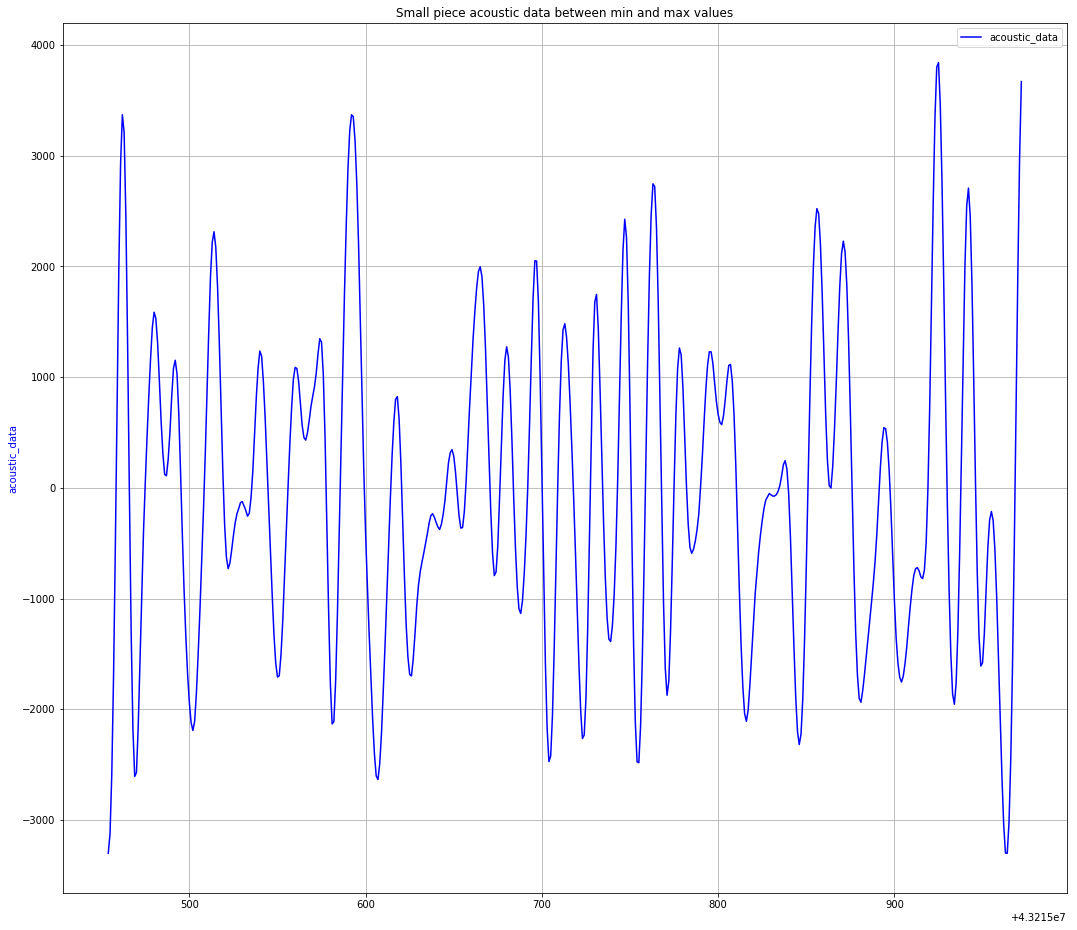

In [39]:
fig8, ax8 = plt.subplots(figsize=(18, 16))
plt.title("Small piece acoustic data between min and max values")
plt.plot(for_investigation_df['acoustic_data'].iloc[acoustic_data_idxmin:acoustic_data_idxmax], color='b')
ax8.set_ylabel("acoustic_data", color='b')
plt.legend(["acoustic_data"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

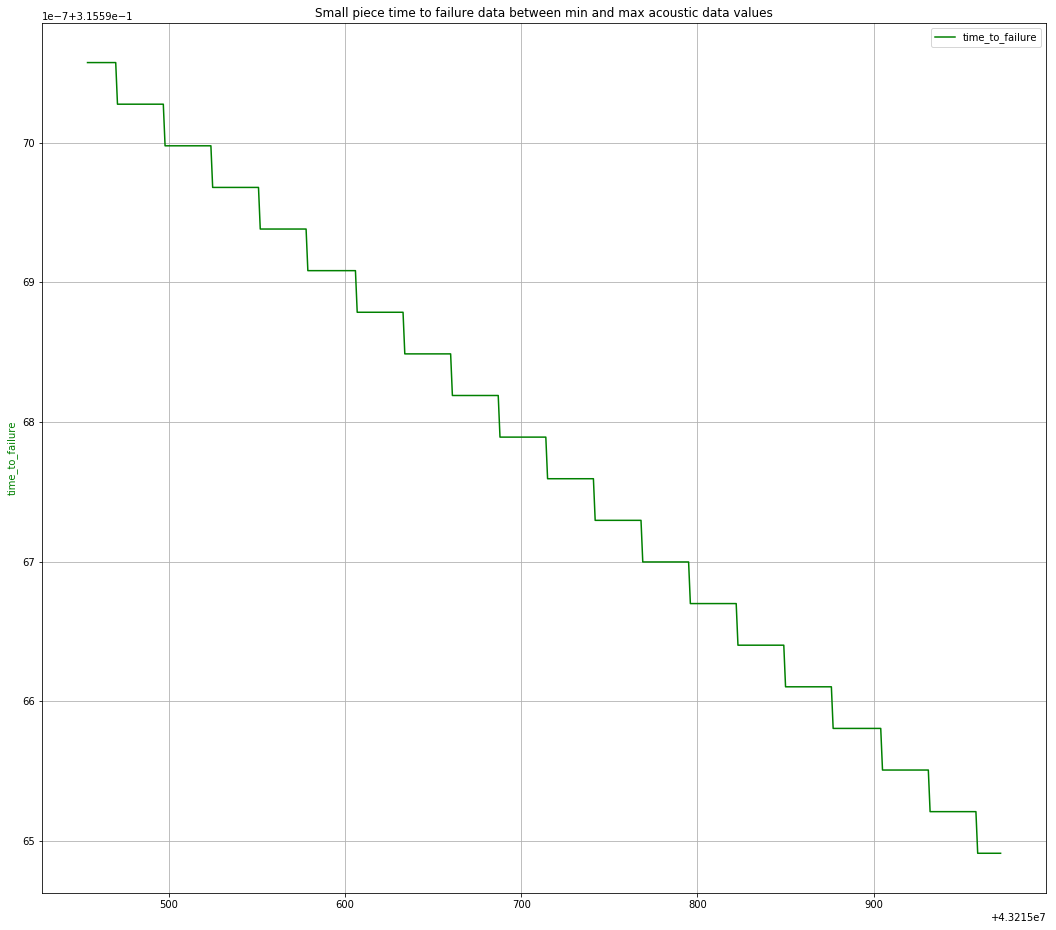

In [40]:
fig9, ax9 = plt.subplots(figsize=(18, 16))
plt.title("Small piece time to failure data between min and max acoustic data values")
plt.plot(for_investigation_df['time_to_failure'].iloc[acoustic_data_idxmin:acoustic_data_idxmax], color='g')
ax9.set_ylabel("time_to_failure", color='g')
plt.legend(["time_to_failure"])
#ax2 = ax1.twinx()
#plt.plot(time_to_failure_chunks, color='g')
#ax2.set_ylabel('time_to_failure', color='g')
#plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(True)

In [44]:
for_investigation_df.sort_values?

In [45]:
sorted_df = for_investigation_df.sort_values('acoustic_data')

In [46]:
sorted_df.head()

,acoustic_data,time_to_failure
43215964,-3301.0,0.315596
43215454,-3301.0,0.315597
43215963,-3300.0,0.315596
43215453,-3159.0,0.315597
43215455,-3125.0,0.315597


In [47]:
sorted_df.tail()

,acoustic_data,time_to_failure
43214839,3671.0,0.315598
43215974,3691.0,0.315596
43215924,3800.0,0.315597
43215925,3841.0,0.315597
43215973,3914.0,0.315596


In [79]:
def get_extremal_values(df, sort_field_name='acoustic_data', num_of_extremals=12):
    sorted_df = df.sort_values(sort_field_name)
    extremal_values = []
    for i in range(num_of_extremals):
        idx_min = sorted_df.index[i]
        idx_max = sorted_df.index[-i - 1]
        min_v = df.iloc[idx_min][sort_field_name]
        max_v = df.iloc[idx_max][sort_field_name]
        extremal_values.append((
            min_v,
            max_v,
            max_v - min_v,
            max_v + min_v,
            idx_min,
            idx_max,
            idx_max - idx_min
        ))
    return extremal_values

In [80]:
extremal_values = get_extremal_values(for_investigation_df)

In [81]:
print(extremal_values)

[(-3301.0, 3914.0, 7215.0, 613.0, 43215964, 43215973, 9), (-3301.0, 3841.0, 7142.0, 540.0, 43215454, 43215925, 471), (-3300.0, 3800.0, 7100.0, 500.0, 43215963, 43215924, -39), (-3159.0, 3691.0, 6850.0, 532.0, 43215453, 43215974, 521), (-3125.0, 3671.0, 6796.0, 546.0, 43215455, 43214839, -616), (-3051.0, 3669.0, 6720.0, 618.0, 43215962, 43215972, 10), (-3032.0, 3545.0, 6577.0, 513.0, 43214830, 43214840, 10), (-3024.0, 3466.0, 6490.0, 442.0, 43215965, 43214838, -1127), (-2940.0, 3462.0, 6402.0, 522.0, 43214829, 43215926, 1097), (-2814.0, 3370.0, 6184.0, 556.0, 43214886, 43215462, 576), (-2799.0, 3369.0, 6168.0, 570.0, 43214831, 43215592, 761), (-2745.0, 3352.0, 6097.0, 607.0, 43215452, 43215593, 141)]


In [82]:
sorted_df.values[:5]

array([[-3.3010000e+03,  3.1559649e-01],
       [-3.3010000e+03,  3.1559706e-01],
       [-3.3000000e+03,  3.1559649e-01],
       [-3.1590000e+03,  3.1559706e-01],
       [-3.1250000e+03,  3.1559706e-01]], dtype=float32)

In [86]:
np.vstack?

In [88]:
data_array = np.hstack(
    (
        for_investigation_df['acoustic_data'].values,
        for_investigation_df['time_to_failure'].values,
        for_investigation_df.index.values
    )
)

In [89]:
data_array[:5]

array([5., 4., 4., 5., 6.])

In [100]:
df_with_idx_column = for_investigation_df.reset_index()

In [101]:
df_with_idx_column.head()

,index,acoustic_data,time_to_failure
0,0,5.0,0.000795
1,1,4.0,0.000795
2,2,4.0,11.540800
3,3,5.0,11.540800
4,4,6.0,11.540800


In [117]:
data_array_with_idx = df_with_idx_column.values

In [93]:
del df_with_idx_column
gc.collect()

8134

In [94]:
data_array_with_idx[:8]

array([[0.00000000e+00, 5.00000000e+00, 7.95480912e-04],
       [1.00000000e+00, 4.00000000e+00, 7.95479806e-04],
       [2.00000000e+00, 4.00000000e+00, 1.15408001e+01],
       [3.00000000e+00, 5.00000000e+00, 1.15408001e+01],
       [4.00000000e+00, 6.00000000e+00, 1.15408001e+01],
       [5.00000000e+00, 3.00000000e+00, 1.15408001e+01],
       [6.00000000e+00, 4.00000000e+00, 1.15408001e+01],
       [7.00000000e+00, 3.00000000e+00, 1.15408001e+01]])

In [95]:
data_array_with_idx.shape

(44429304, 3)

In [96]:
data_array_with_idx.sort?

In [103]:
data_array_with_idx.sort(axis=1)

In [104]:
data_array_with_idx[:8]

array([[0.00000000e+00, 7.95480912e-04, 5.00000000e+00],
       [7.95479806e-04, 1.00000000e+00, 4.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 1.15408001e+01],
       [3.00000000e+00, 5.00000000e+00, 1.15408001e+01],
       [4.00000000e+00, 6.00000000e+00, 1.15408001e+01],
       [3.00000000e+00, 5.00000000e+00, 1.15408001e+01],
       [4.00000000e+00, 6.00000000e+00, 1.15408001e+01],
       [3.00000000e+00, 7.00000000e+00, 1.15408001e+01]])

Найти min max для каждого землетрясения (ну или для каждого временного сегмента) и расстояние между ними (time points),
затем имея глобальные (для сегмента) min и max, найти следующие (наименьший min больший глобального, и наибольший max меньший глобального), и расстояние между ними,и т.д. Посмотреть какие features можно построить из этого всего (Например, разделить разность максимального и минимального на расстояние между ними)... Посмотреть на оси времени (индексов) расположение этих интервалов.

In [109]:
def get_extremal_values_np(ar, sort_column=1, num_of_extremals=12):
    sorted_ar = ar[ar[:, 1].argsort()]
    extremal_values = np.zeros(shape=(num_of_extremals, 7))
    for i in range(num_of_extremals):
        row_min = sorted_ar[i]
        row_max = sorted_ar[-i]
        min_v = row_min[1]
        max_v = row_max[1]
        min_idx = row_min[0]
        max_idx = row_max[0]
        extremal_values[i] = np.array((
            min_v,
            max_v,
            max_v - min_v,
            max_v + min_v,
            min_idx,
            max_idx,
            max_idx - min_idx
        ))
    return extremal_values

In [110]:
extremal_values_ar = get_extremal_values_np(data_array_with_idx)

In [112]:
print(extremal_values_ar)

[[ 6.95484399e-04  6.95484399e-04  0.00000000e+00  1.39096880e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.95504190e-04  3.91400000e+03  3.91399930e+03  3.91400070e+03
   0.00000000e+00  3.15596491e-01  3.15596491e-01]
 [ 6.95506402e-04  3.84100000e+03  3.84099930e+03  3.84100070e+03
  -1.00000000e+00  3.15596551e-01  1.31559655e+00]
 [ 6.95538300e-04  3.80000000e+03  3.79999930e+03  3.80000070e+03
   0.00000000e+00  3.15596551e-01  3.15596551e-01]
 [ 6.95552561e-04  3.69100000e+03  3.69099930e+03  3.69100070e+03
   0.00000000e+00  3.15596491e-01  3.15596491e-01]
 [ 6.95594354e-04  3.67100000e+03  3.67099930e+03  3.67100070e+03
   0.00000000e+00  3.15597743e-01  3.15597743e-01]
 [ 6.95605355e-04  3.66900000e+03  3.66899930e+03  3.66900070e+03
   0.00000000e+00  3.15596491e-01  3.15596491e-01]
 [ 6.95674680e-04  3.54500000e+03  3.54499930e+03  3.54500070e+03
   0.00000000e+00  3.15597743e-01  3.15597743e-01]
 [ 6.95697789e-04  3.46600000e+03  3.46599930e+03  3.46600070e+0

In [113]:
print(extremal_values)

[(-3301.0, 3914.0, 7215.0, 613.0, 43215964, 43215973, 9), (-3301.0, 3841.0, 7142.0, 540.0, 43215454, 43215925, 471), (-3300.0, 3800.0, 7100.0, 500.0, 43215963, 43215924, -39), (-3159.0, 3691.0, 6850.0, 532.0, 43215453, 43215974, 521), (-3125.0, 3671.0, 6796.0, 546.0, 43215455, 43214839, -616), (-3051.0, 3669.0, 6720.0, 618.0, 43215962, 43215972, 10), (-3032.0, 3545.0, 6577.0, 513.0, 43214830, 43214840, 10), (-3024.0, 3466.0, 6490.0, 442.0, 43215965, 43214838, -1127), (-2940.0, 3462.0, 6402.0, 522.0, 43214829, 43215926, 1097), (-2814.0, 3370.0, 6184.0, 556.0, 43214886, 43215462, 576), (-2799.0, 3369.0, 6168.0, 570.0, 43214831, 43215592, 761), (-2745.0, 3352.0, 6097.0, 607.0, 43215452, 43215593, 141)]


In [139]:
43215963 - 43215924

39

In [106]:
np.zeros?

In [107]:
z_ar = np.zeros(shape=4)

In [108]:
z_ar

array([0., 0., 0., 0.])

In [115]:
sorted_ar = data_array_with_idx[data_array_with_idx[:, 1].argsort()]

In [114]:
sorted_df.head()

,acoustic_data,time_to_failure
43215964,-3301.0,0.315596
43215454,-3301.0,0.315597
43215963,-3300.0,0.315596
43215453,-3159.0,0.315597
43215455,-3125.0,0.315597


In [116]:
sorted_ar[:5]

array([[ 0.00000000e+00,  6.95484399e-04,  4.44293030e+07],
       [ 0.00000000e+00,  6.95504190e-04,  4.44292850e+07],
       [-1.00000000e+00,  6.95506402e-04,  4.44292830e+07],
       [ 0.00000000e+00,  6.95538300e-04,  4.44292540e+07],
       [ 0.00000000e+00,  6.95552561e-04,  4.44292410e+07]])

In [118]:
df_with_idx_column.head()

,index,acoustic_data,time_to_failure
0,0,5.0,0.000795
1,1,4.0,0.000795
2,2,4.0,11.540800
3,3,5.0,11.540800
4,4,6.0,11.540800


In [119]:
data_array_with_idx[:5]

array([[0.00000000e+00, 5.00000000e+00, 7.95480912e-04],
       [1.00000000e+00, 4.00000000e+00, 7.95479806e-04],
       [2.00000000e+00, 4.00000000e+00, 1.15408001e+01],
       [3.00000000e+00, 5.00000000e+00, 1.15408001e+01],
       [4.00000000e+00, 6.00000000e+00, 1.15408001e+01]])

In [120]:
data_array_with_idx[:, 0][:5]

array([0., 1., 2., 3., 4.])

In [123]:
data_array_with_idx[:, 1][:5]

array([5., 4., 4., 5., 6.])

In [124]:
data_array_with_idx[:, 2][:5]

array([7.95480912e-04, 7.95479806e-04, 1.15408001e+01, 1.15408001e+01,
       1.15408001e+01])

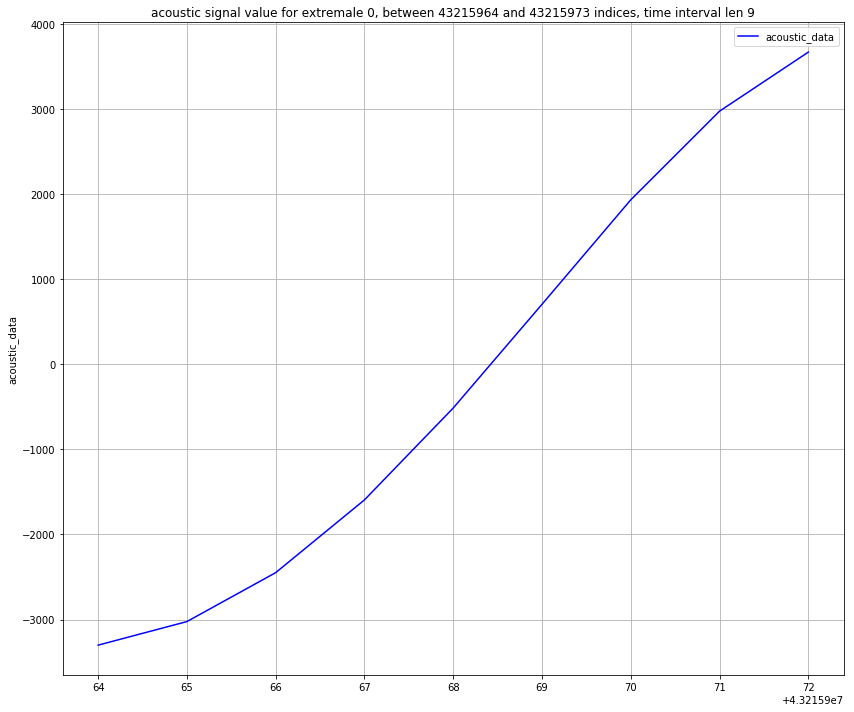

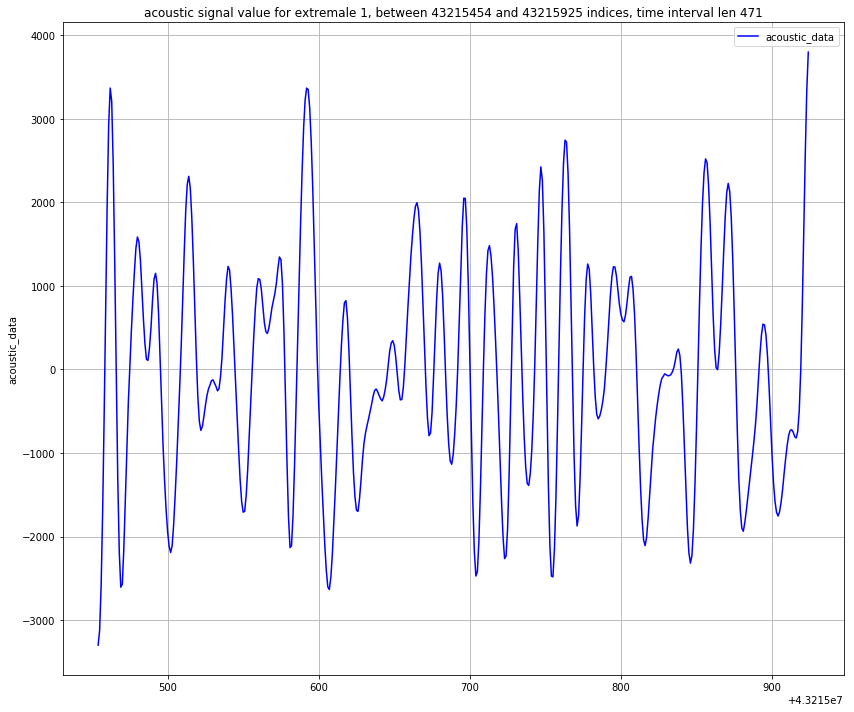

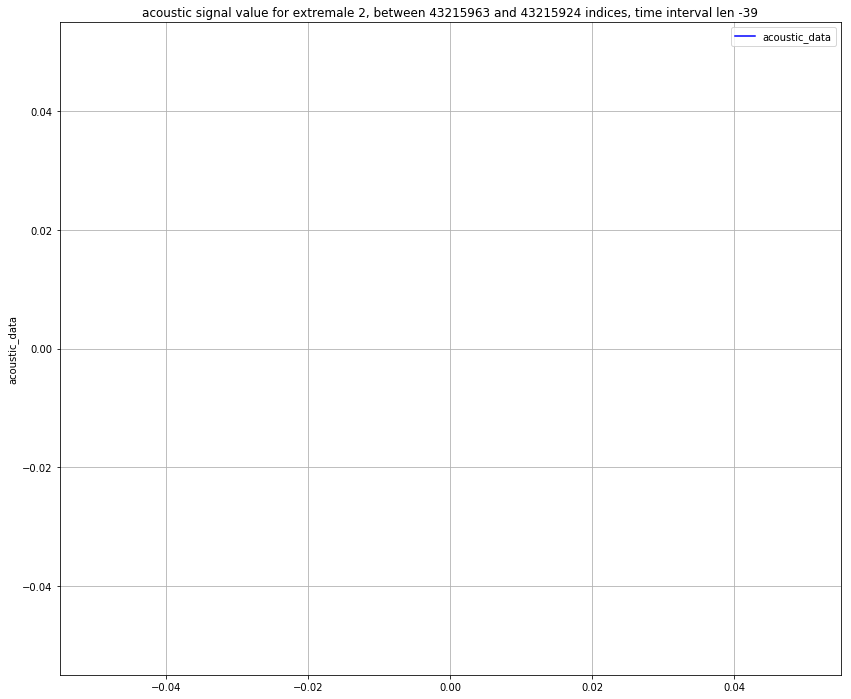

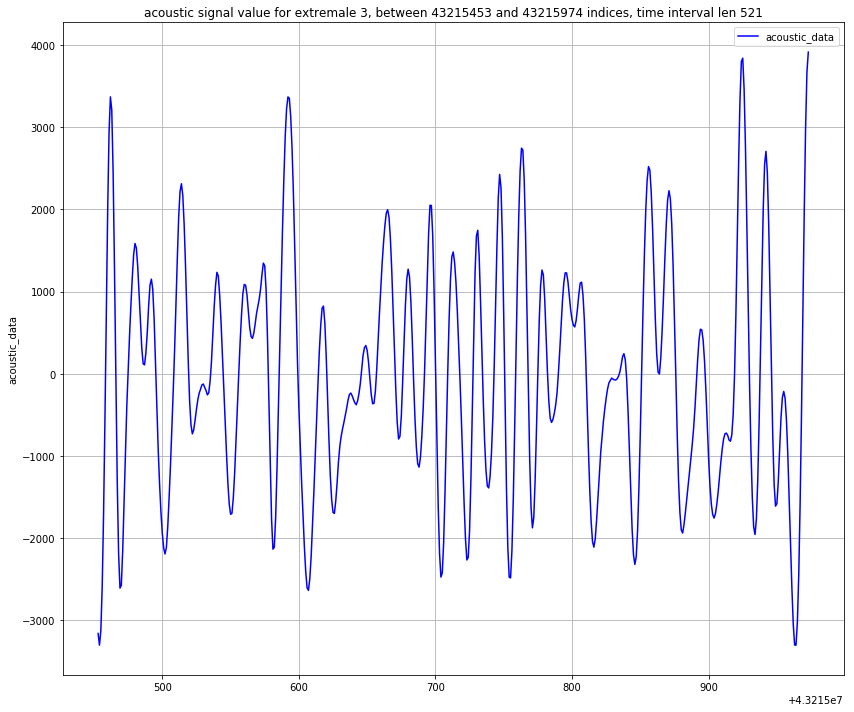

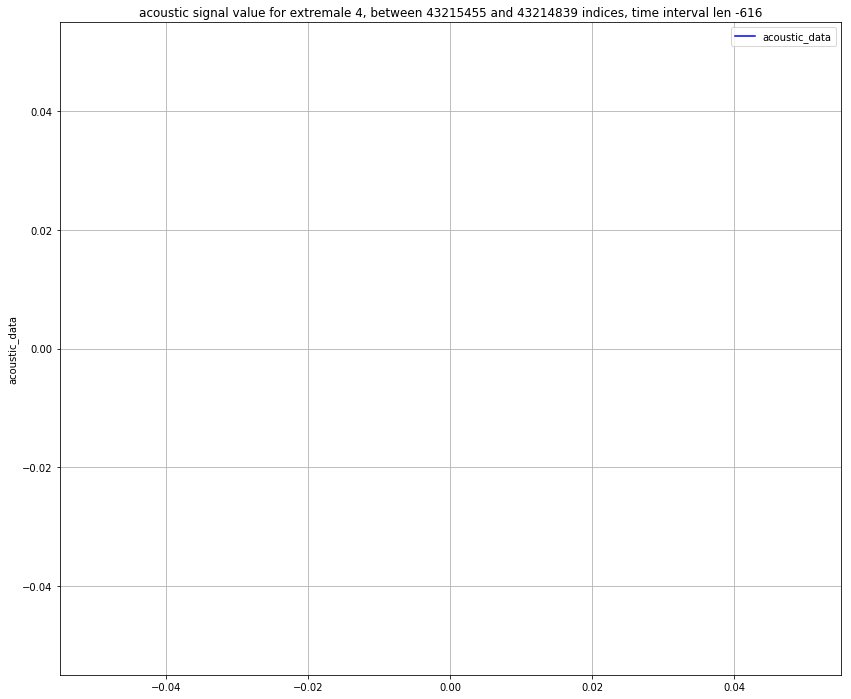

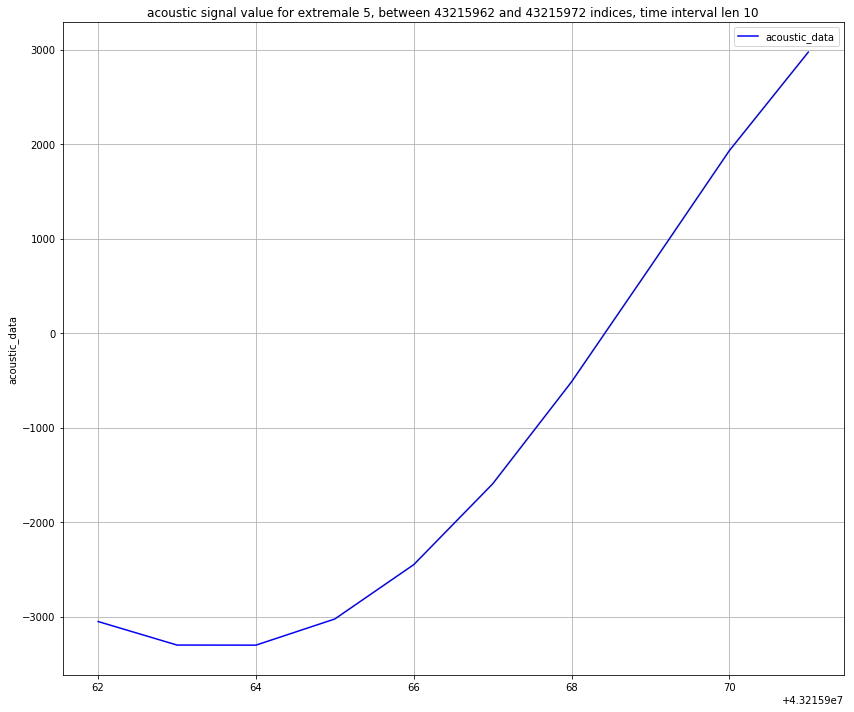

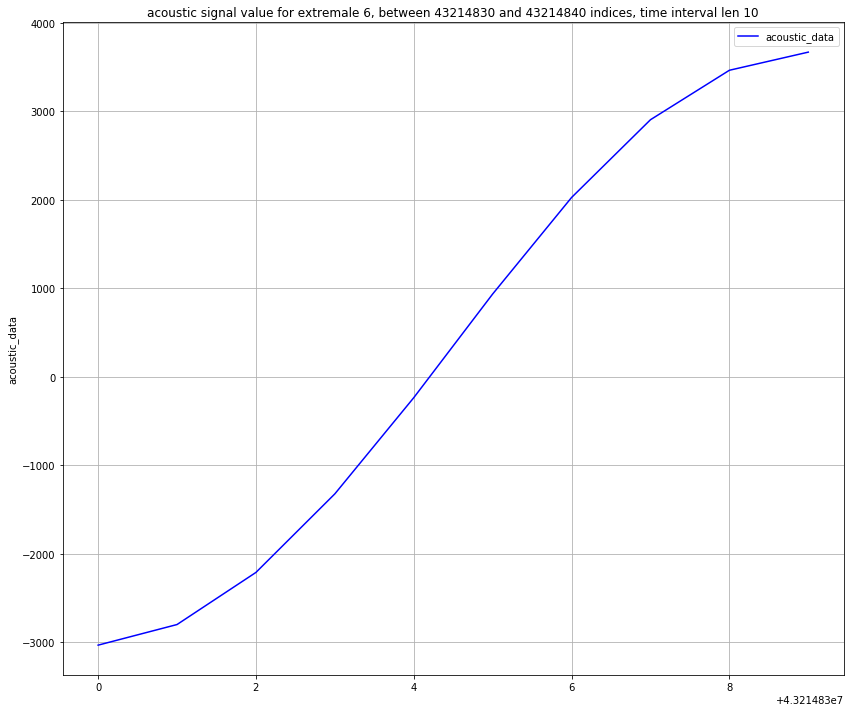

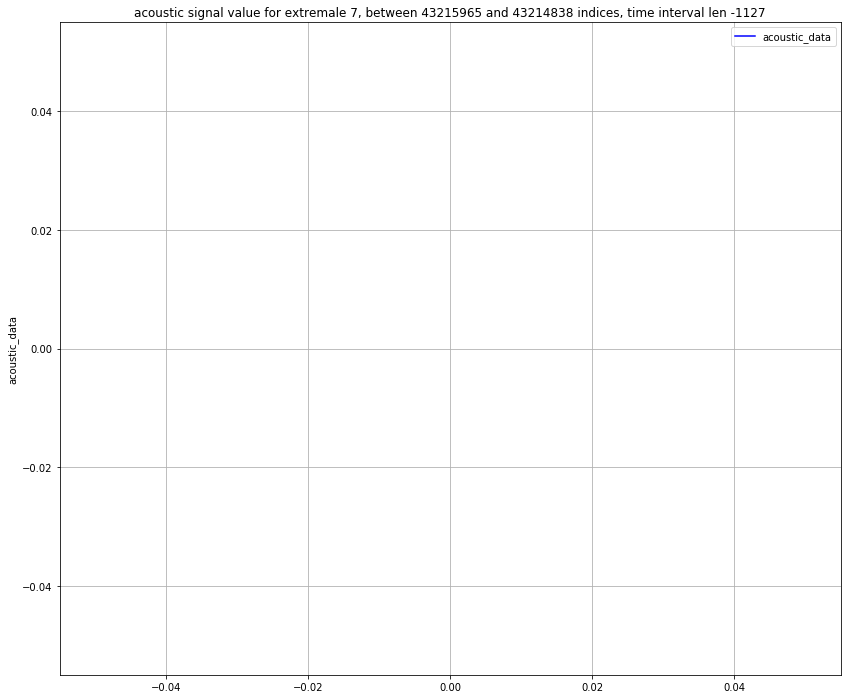

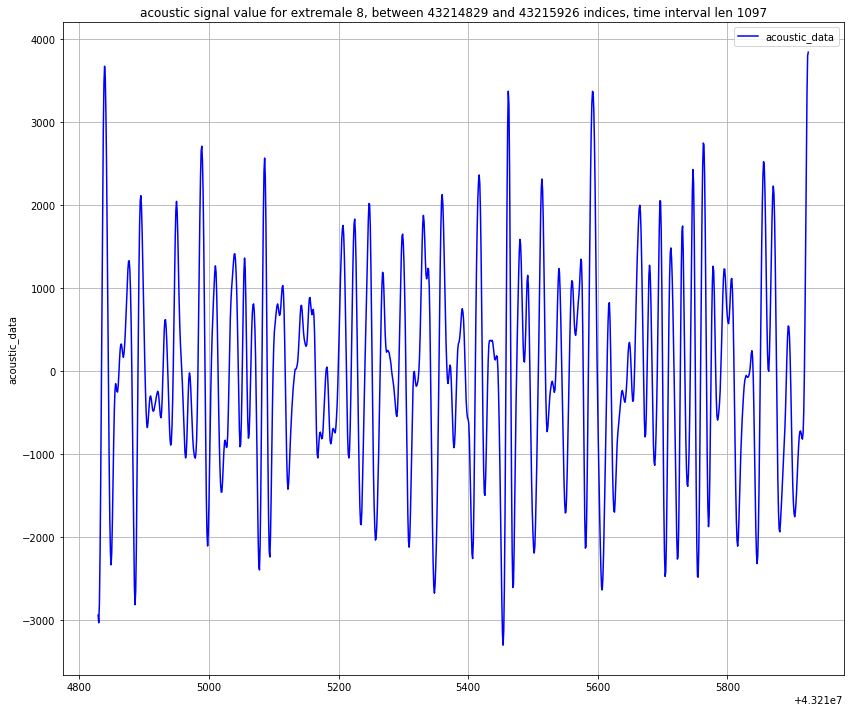

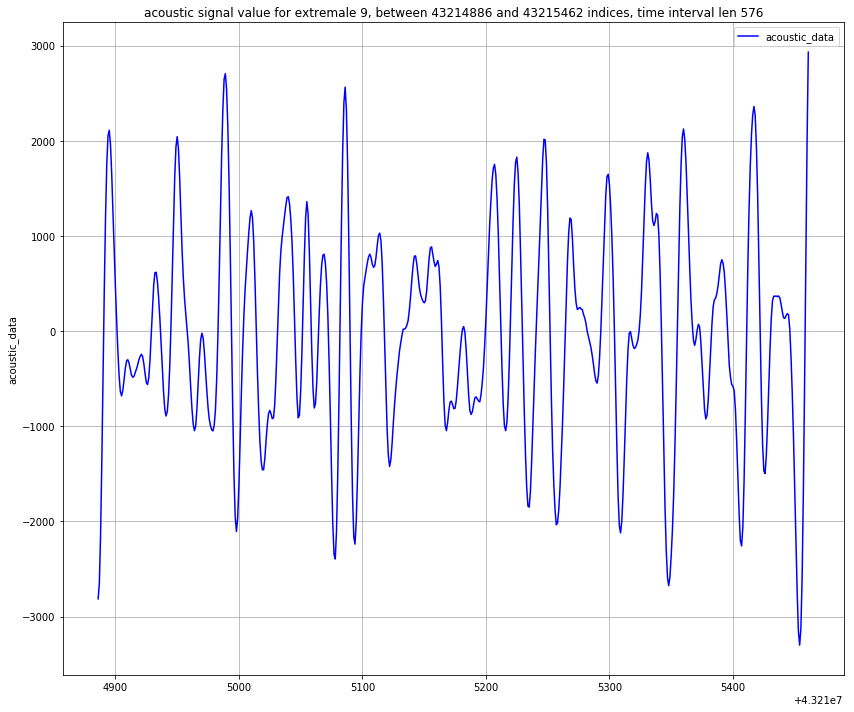

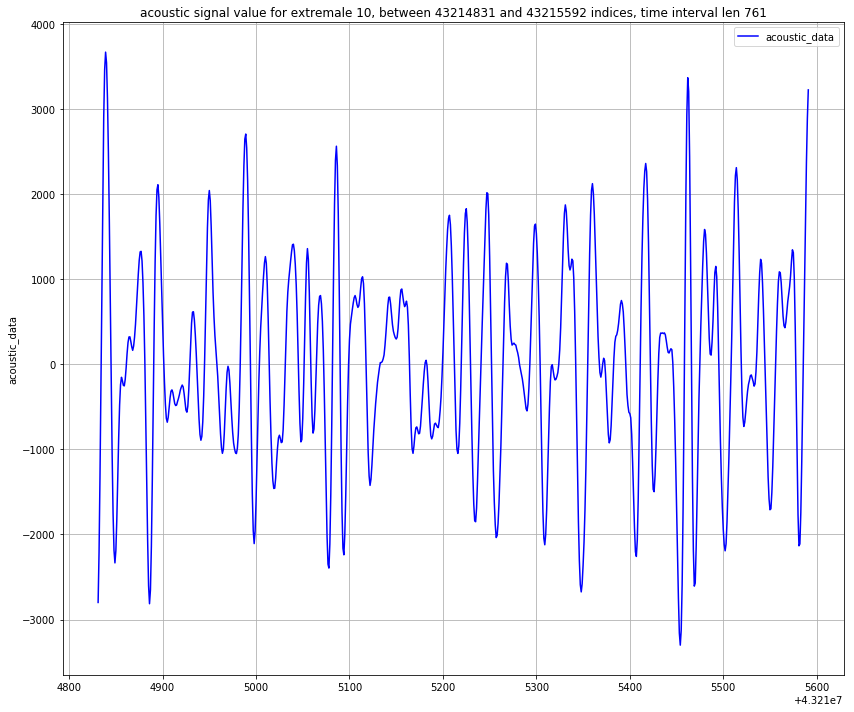

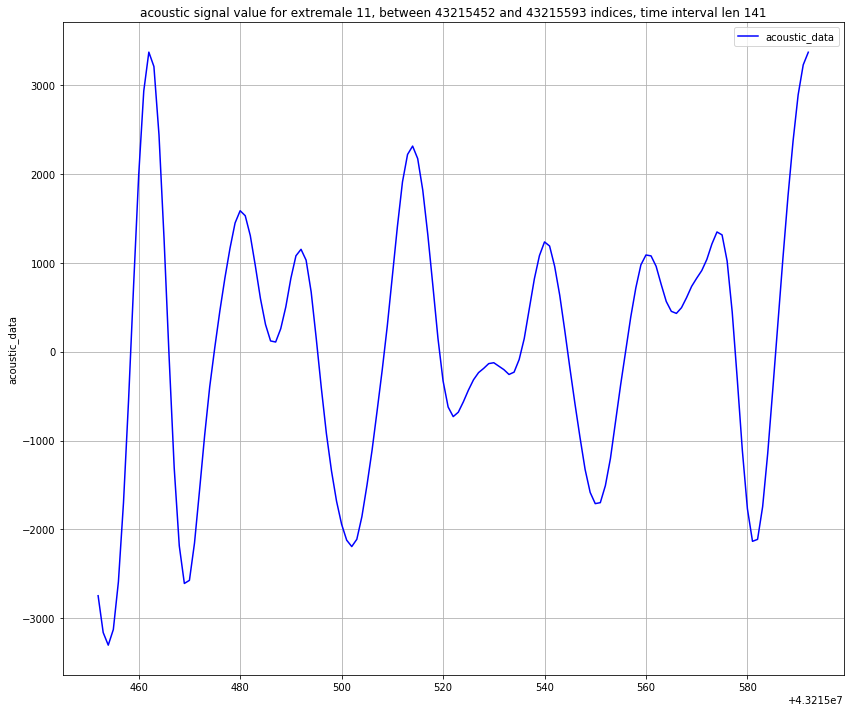

In [130]:
for i, item in enumerate(extremal_values):
    idx_min = item[4]
    idx_max = item[5]
    time_interval_len = item[6]
    fig, ax = plt.subplots(figsize=(14, 12))
    plt.title(
        "acoustic signal value for extremale {}, between {} and {} indices, time interval len {}".format(
            i,
            idx_min,
            idx_max,
            time_interval_len
        ))
    plt.plot(for_investigation_df['acoustic_data'].iloc[idx_min:idx_max], color='b')
    ax.set_ylabel("acoustic_data")
    plt.legend(["acoustic_data"])
    #ax2 = ax1.twinx()
    #plt.plot(time_to_failure_chunks, color='g')
    #ax2.set_ylabel('time_to_failure', color='g')
    #plt.legend(['time_to_failure'], loc=(0.875, 0.9))
    plt.grid(True)

In [135]:
def get_extremal_accelerations(df, sort_field_name='acoustic_data', num_of_extremals=12):
    sorted_df = df.sort_values(sort_field_name)
    extremal_accelerations = []
    for i in range(num_of_extremals):
        idx_min = sorted_df.index[i]
        idx_max = sorted_df.index[-i - 1]
        min_v = df.iloc[idx_min][sort_field_name]
        max_v = df.iloc[idx_max][sort_field_name]
        extremal_accelerations.append((
            (max_v - min_v) / (idx_max - idx_min)
        ))
    return extremal_accelerations

In [137]:
extremal_accelerations = get_extremal_accelerations(for_investigation_df, sort_field_name='acoustic_data', num_of_extremals=12)

In [138]:
extremal_accelerations

[801.6666666666666,
 15.163481953290871,
 -182.05128205128204,
 13.147792706333973,
 -11.032467532467532,
 672.0,
 657.7,
 -5.758651286601597,
 5.8359161349134006,
 10.73611111111111,
 8.105124835742444,
 43.241134751773046]

In [140]:
acoustic_s = for_investigation_df['acoustic_data']

In [141]:
type(acoustic_s)

pandas.core.series.Series

In [192]:
acoustic_s_sorted = acoustic_s.sort_values()

In [193]:
acoustic_s_sorted.head()

43215964   -3301.0
43215454   -3301.0
43215963   -3300.0
43215453   -3159.0
43215455   -3125.0
Name: acoustic_data, dtype: float32

In [194]:
acoustic_s_sorted.tail()

43214839    3671.0
43215974    3691.0
43215924    3800.0
43215925    3841.0
43215973    3914.0
Name: acoustic_data, dtype: float32

In [ ]:
def get_extremal_accelerations(series, num_of_extremals=12):
    sorted_series = series.sort_values()
    extremal_accelerations = []
    for i in range(num_of_extremals):
        idx_min = sorted_series.index[i]
        idx_max = sorted_series.index[-i - 1]
        min_v = series.iloc[idx_min]
        max_v = series.iloc[idx_max]
        extremal_accelerations.append((
            (max_v - min_v) / (idx_max - idx_min)
        ))
    return extremal_accelerations

In [205]:
def get_extremals(series, num_of_extremals=12):
    #print("type(series):", type(series))
    sorted_series = series.sort_values()
    extremals_indexes = set()
    extremals = []
    sets = []
    for i in range(num_of_extremals):
        idx_min = sorted_series.index[i]
        idx_max = sorted_series.index[-i - 1]
        print("idx_min:", idx_min, " idx_max:", idx_max, " idx_max - idx_min:", idx_max - idx_min)
        print("value min:", series.iloc[idx_min], " value max:", series.iloc[idx_max])
        #print("set(range(idx_min, idx_max + 1)):\n", set(range(idx_min, idx_max + 1)))
        if idx_min < idx_max:
            sets.append(set(range(idx_min, idx_max + 1)))
            extremals_indexes = extremals_indexes.union(set(range(idx_min, idx_max + 1)))
            extremals.append(series.iloc[idx_min:idx_max])
        else:
            sets.append(set(range(idx_max, idx_min + 1)))
            extremals.append(series.iloc[idx_max:idx_min])
            extremals_indexes = extremals_indexes.union(set(range(idx_max, idx_min + 1)))
    print("len(extremals_indexes):", len(extremals_indexes))
    return extremals, series.loc[set(series.index).difference(extremals_indexes)], sets

In [206]:
extremals, not_extremals, sets = get_extremals(for_investigation_df['acoustic_data'], 6)

idx_min: 43215964  idx_max: 43215973  idx_max - idx_min: 9
value min: -3301.0  value max: 3914.0
idx_min: 43215454  idx_max: 43215925  idx_max - idx_min: 471
value min: -3301.0  value max: 3841.0
idx_min: 43215963  idx_max: 43215924  idx_max - idx_min: -39
value min: -3300.0  value max: 3800.0
idx_min: 43215453  idx_max: 43215974  idx_max - idx_min: 521
value min: -3159.0  value max: 3691.0
idx_min: 43215455  idx_max: 43214839  idx_max - idx_min: -616
value min: -3125.0  value max: 3671.0
idx_min: 43215962  idx_max: 43215972  idx_max - idx_min: 10
value min: -3051.0  value max: 3669.0
len(extremals_indexes): 1136


In [160]:
type(not_extremals)

pandas.core.series.Series

In [198]:
not_extremals.shape

(44428168,)

In [181]:
extremals[0]

43215964   -3301.0
43215965   -3024.0
43215966   -2449.0
43215967   -1594.0
43215968    -514.0
43215969     705.0
43215970    1933.0
43215971    2975.0
43215972    3669.0
Name: acoustic_data, dtype: float32

In [180]:
extremals[1]

43215454   -3301.0
43215455   -3125.0
43215456   -2588.0
43215457   -1701.0
43215458    -549.0
43215459     750.0
43215460    1987.0
43215461    2933.0
43215462    3370.0
43215463    3208.0
43215464    2440.0
43215465    1269.0
43215466     -65.0
43215467   -1307.0
43215468   -2184.0
43215469   -2607.0
43215470   -2572.0
43215471   -2153.0
43215472   -1556.0
43215473    -942.0
43215474    -395.0
43215475      47.0
43215476     459.0
43215477     831.0
43215478    1164.0
43215479    1448.0
43215480    1586.0
43215481    1530.0
43215482    1306.0
43215483     964.0
             ...  
43215895     534.0
43215896     411.0
43215897     160.0
43215898    -191.0
43215899    -610.0
43215900   -1025.0
43215901   -1365.0
43215902   -1585.0
43215903   -1712.0
43215904   -1755.0
43215905   -1702.0
43215906   -1588.0
43215907   -1437.0
43215908   -1245.0
43215909   -1068.0
43215910    -912.0
43215911    -790.0
43215912    -730.0
43215913    -721.0
43215914    -750.0
43215915    -805.0
43215916    

In [199]:
total_extremals_len = 0
for extremal in extremals:
    total_extremals_len += len(extremal)

In [200]:
total_extremals_len

1666

In [201]:
total_extremals_len + not_extremals.shape[0]

44429834

In [202]:
for_investigation_df.shape[0]

44429304

In [203]:
not_extremals.shape[0]

44428168

In [204]:
for_investigation_df.shape[0] - not_extremals.shape[0]

1136

In [218]:
#sets_shifted = sets[1:]
intersections = []
sets_nums = []
sets_pairs = []
for i, s1 in enumerate(sets):
    for j, s2 in enumerate(sets[i + 1:]):
        sets_pairs.append((s1, s2))
        sets_nums.append((i, j + i + 1))
        intersections.append(s1.intersection(s2))    

In [216]:
len(intersections)

15

In [219]:
for s_n, i_s, p in zip(sets_nums, intersections, sets_pairs):
    print(s_n, ":", len(i_s), " ", len(p[0]), len(p[1]))

(0, 1) : 0   10 472
(0, 2) : 0   10 40
(0, 3) : 10   10 522
(0, 4) : 0   10 617
(0, 5) : 9   10 11
(1, 2) : 2   472 40
(1, 3) : 472   472 522
(1, 4) : 2   472 617
(1, 5) : 0   472 11
(2, 3) : 40   40 522
(2, 4) : 0   40 617
(2, 5) : 2   40 11
(3, 4) : 3   522 617
(3, 5) : 11   522 11
(4, 5) : 0   617 11
